In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

out_dir='plots'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

##------m1.2to17.2  -----------

In [2]:
###----------------m1To17p2_less_unphysical_[16,32,64,128]-------------------------------------------

In [3]:
local='/home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_unphysical_over_populated_with_newModel/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain7200768_nval560128_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

11 files found


In [80]:
epoch=11

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_unphysical_over_populated_with_newModel/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain7200768_nval560128_run0/epoch11_val_pseudoscalar_mae2.1299_inference_data.pkl


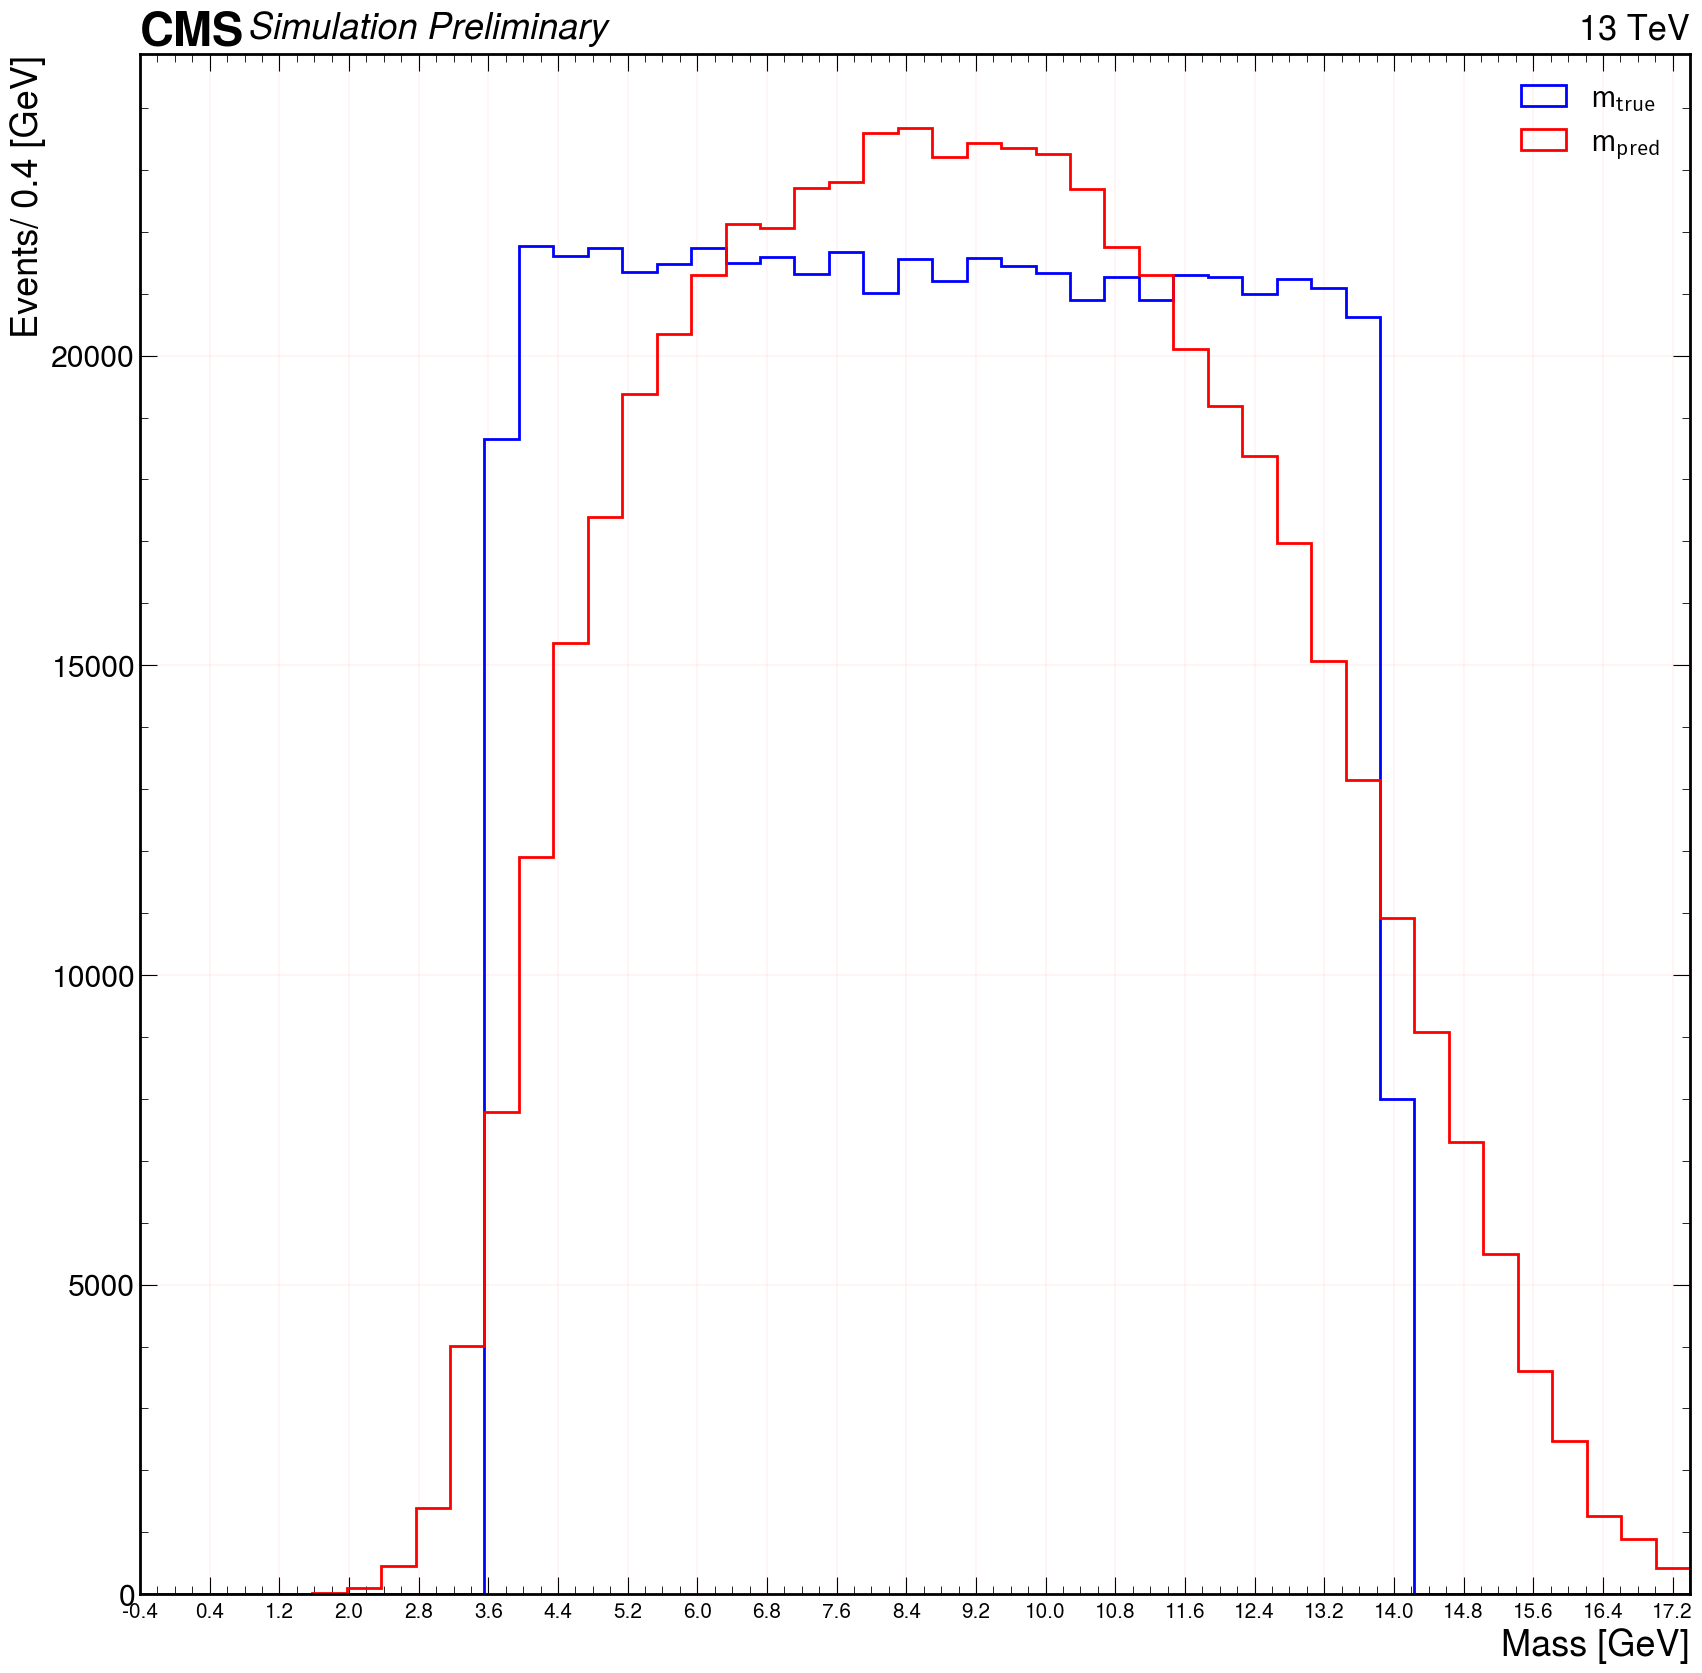

In [81]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 16.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

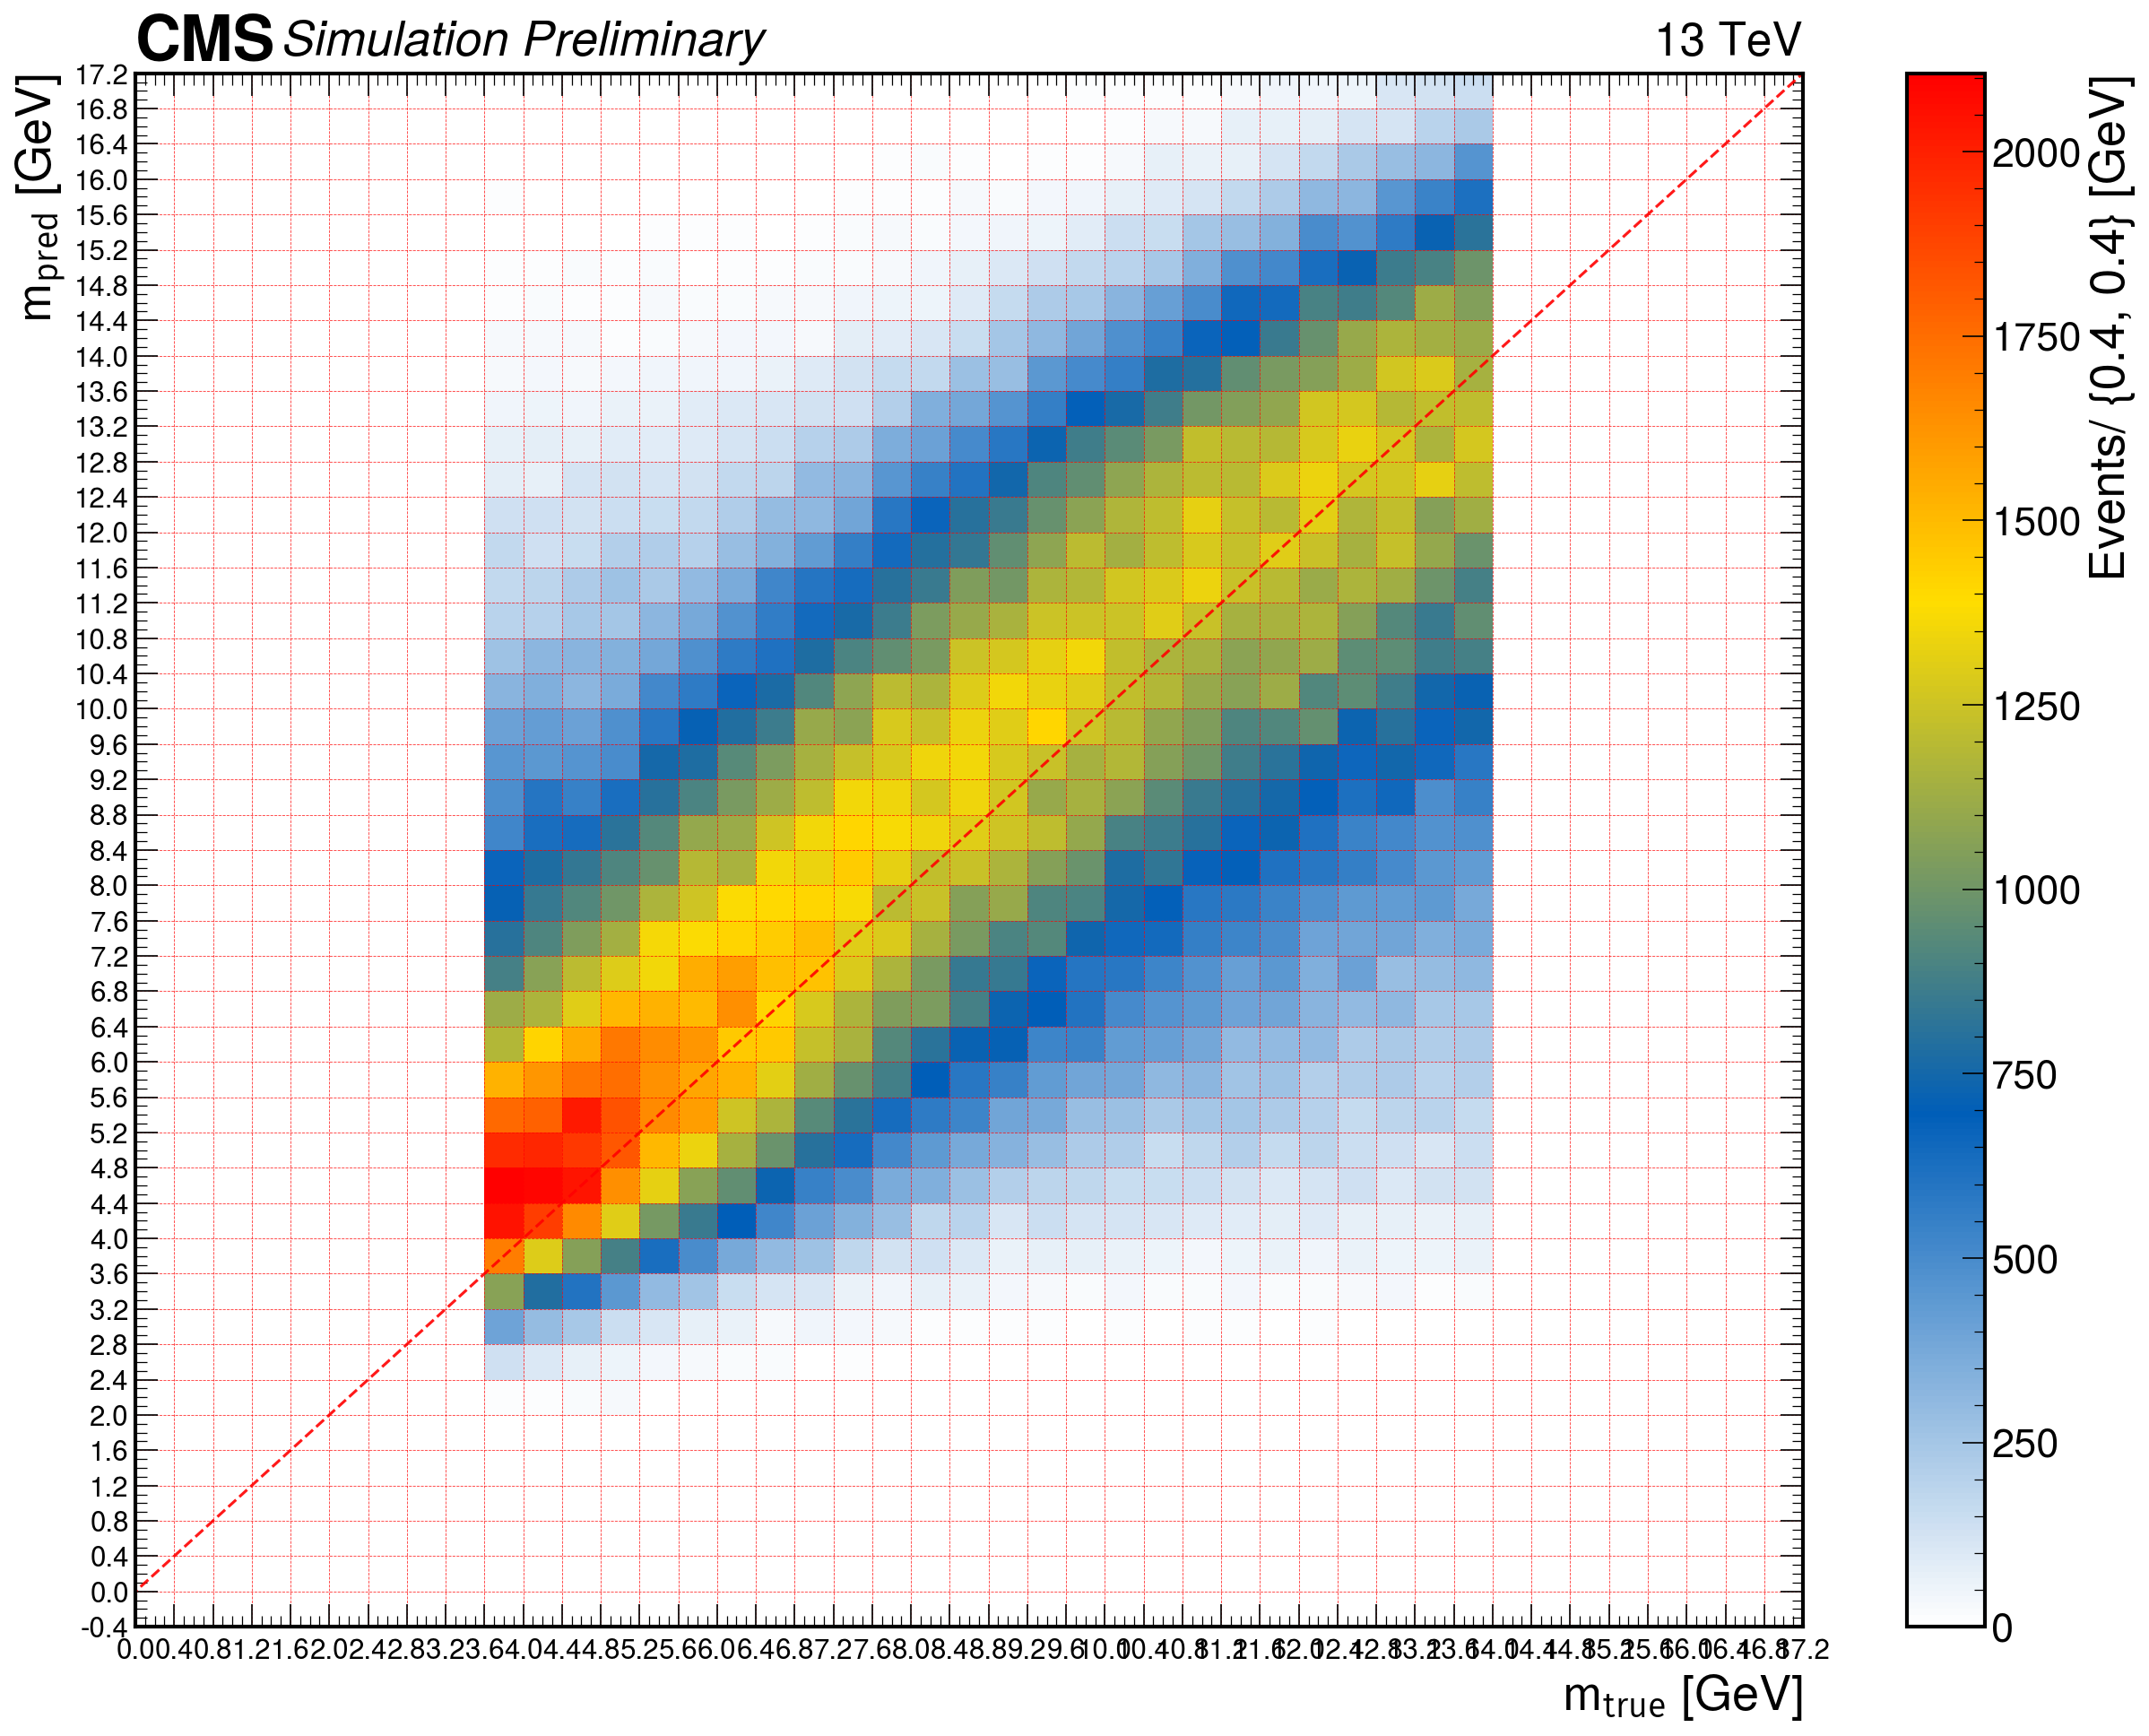

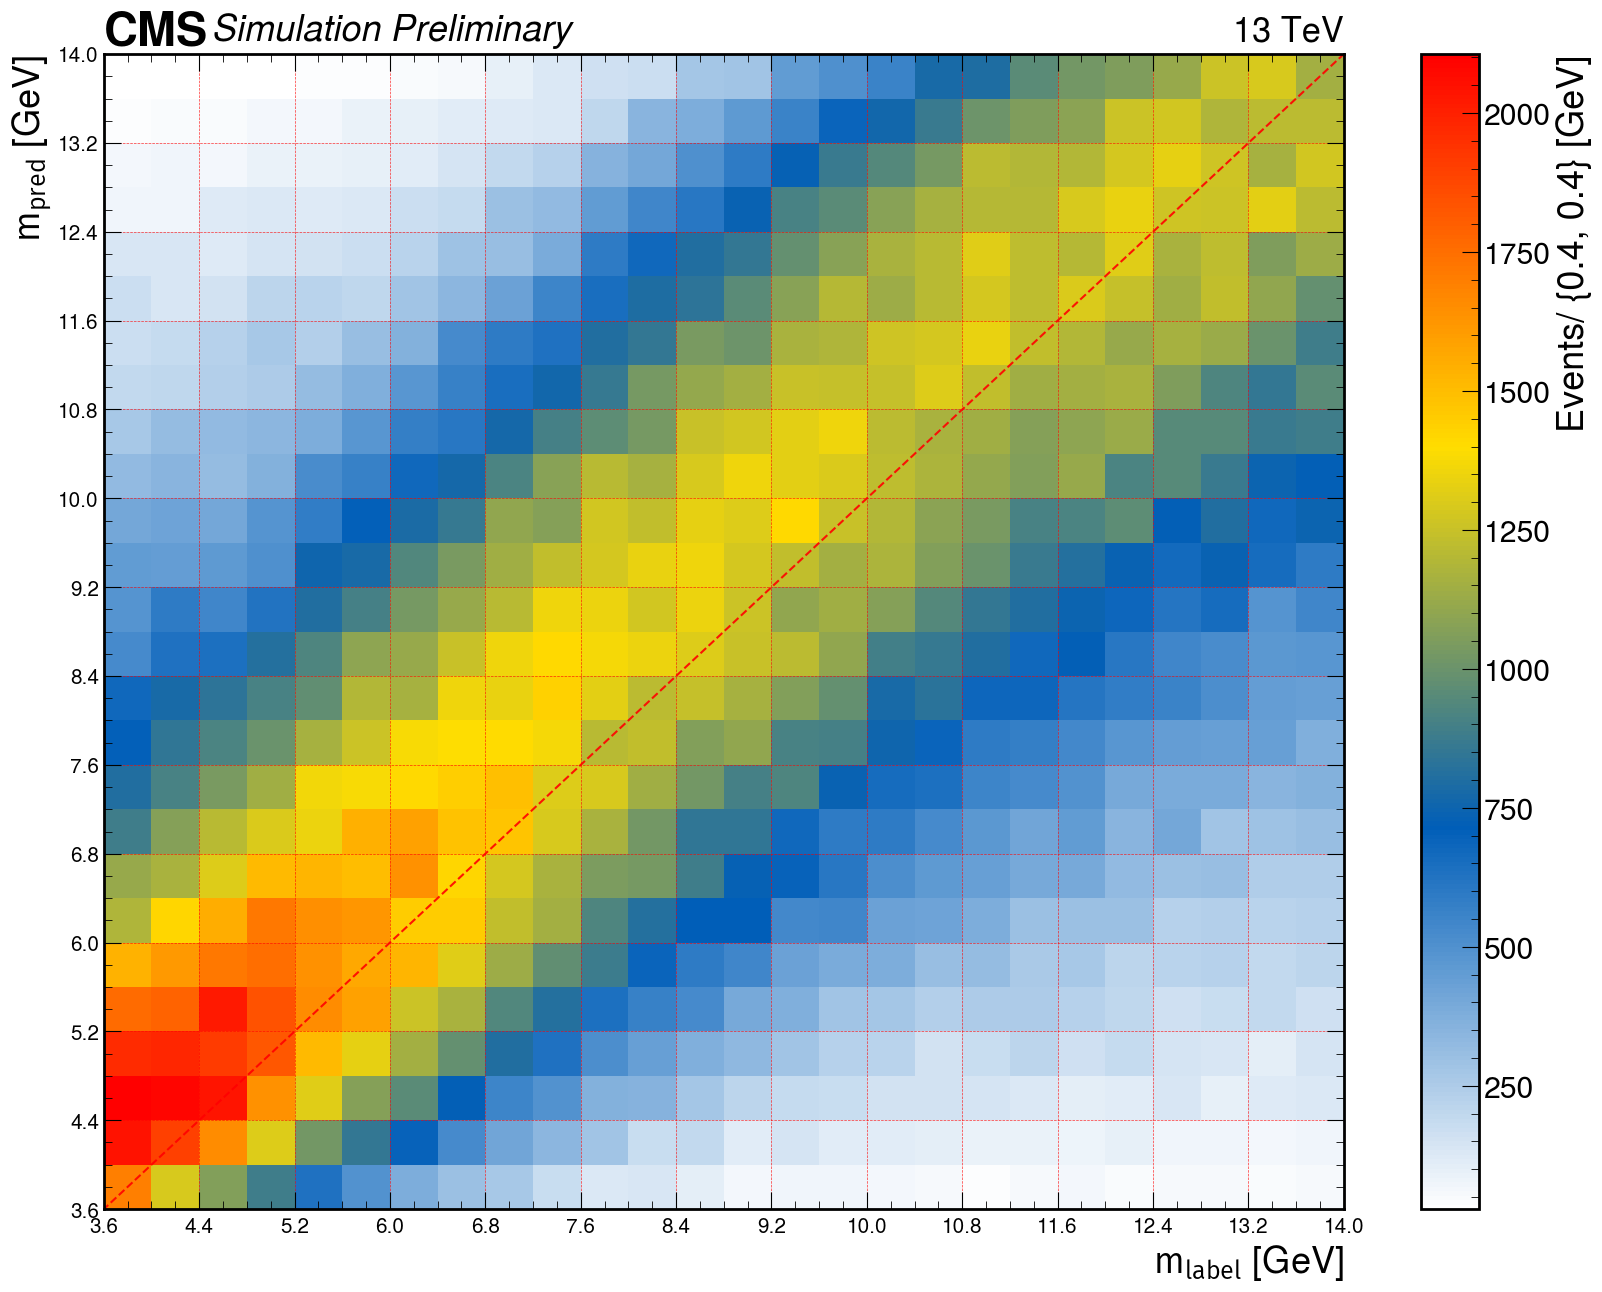

In [82]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .4),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .4),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

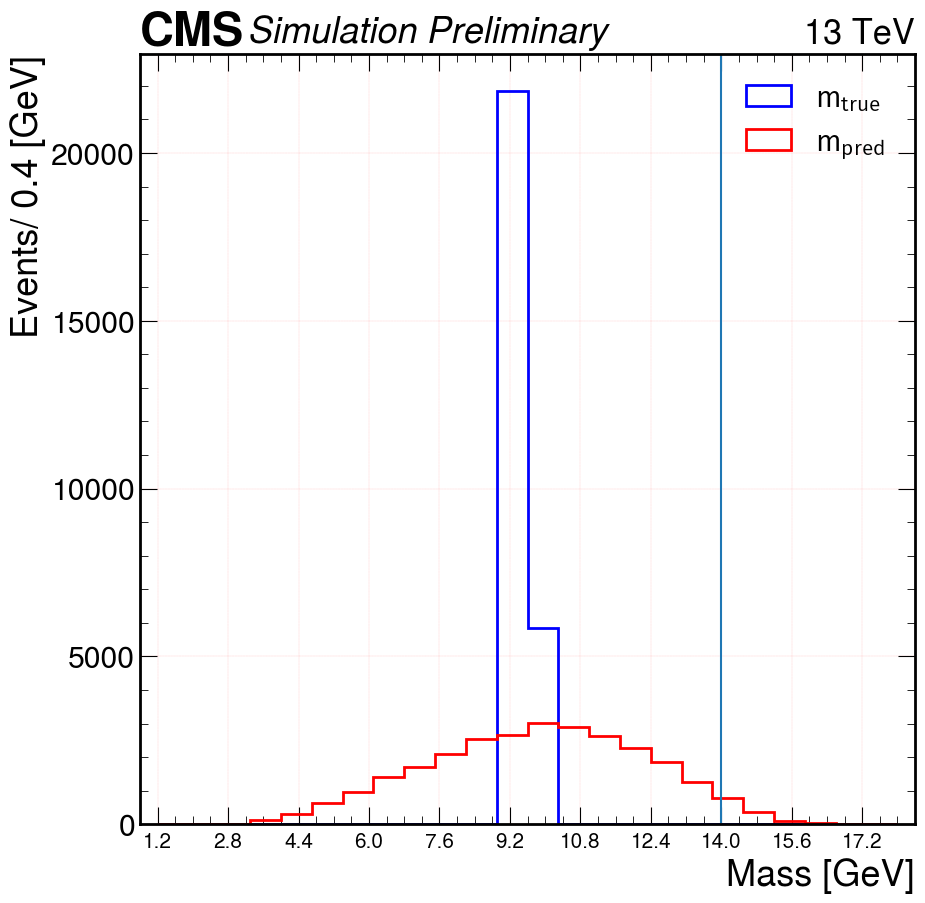

In [83]:
m_true, m_pred = [], []
for i in range(len(m_true_)):
    if m_true_[i]<9.2 or m_true_[i] >9.7 :continue
    m_true.append(m_true_[i])
    m_pred.append(m_pred_[i])
    
bin_size=.4
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(np.squeeze(m_true), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2,log=0)
plt.hist(np.squeeze(m_pred), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2,log=0)
plt.xlim(1.2-bin_size,18+bin_size)
plt.xticks(np.arange(1.2,18+bin_size,1.6),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]' )
plt.axvline(x=14)
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()    
        

In [59]:
###----------------m1To17p2_unphysical_noBN[16,32,64,128]-------------------------------------------

In [32]:
# ! ls -lhtr

In [4]:
local='/home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_less_unphysical_newModel_noBN/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_less_low_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from1_ntrain6571008_nval560128_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

12 files found


In [5]:
epoch=12

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_less_unphysical_newModel_noBN/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_less_low_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from1_ntrain6571008_nval560128_run0/epoch13_val_pseudoscalar_mae1.7725_inference_data.pkl


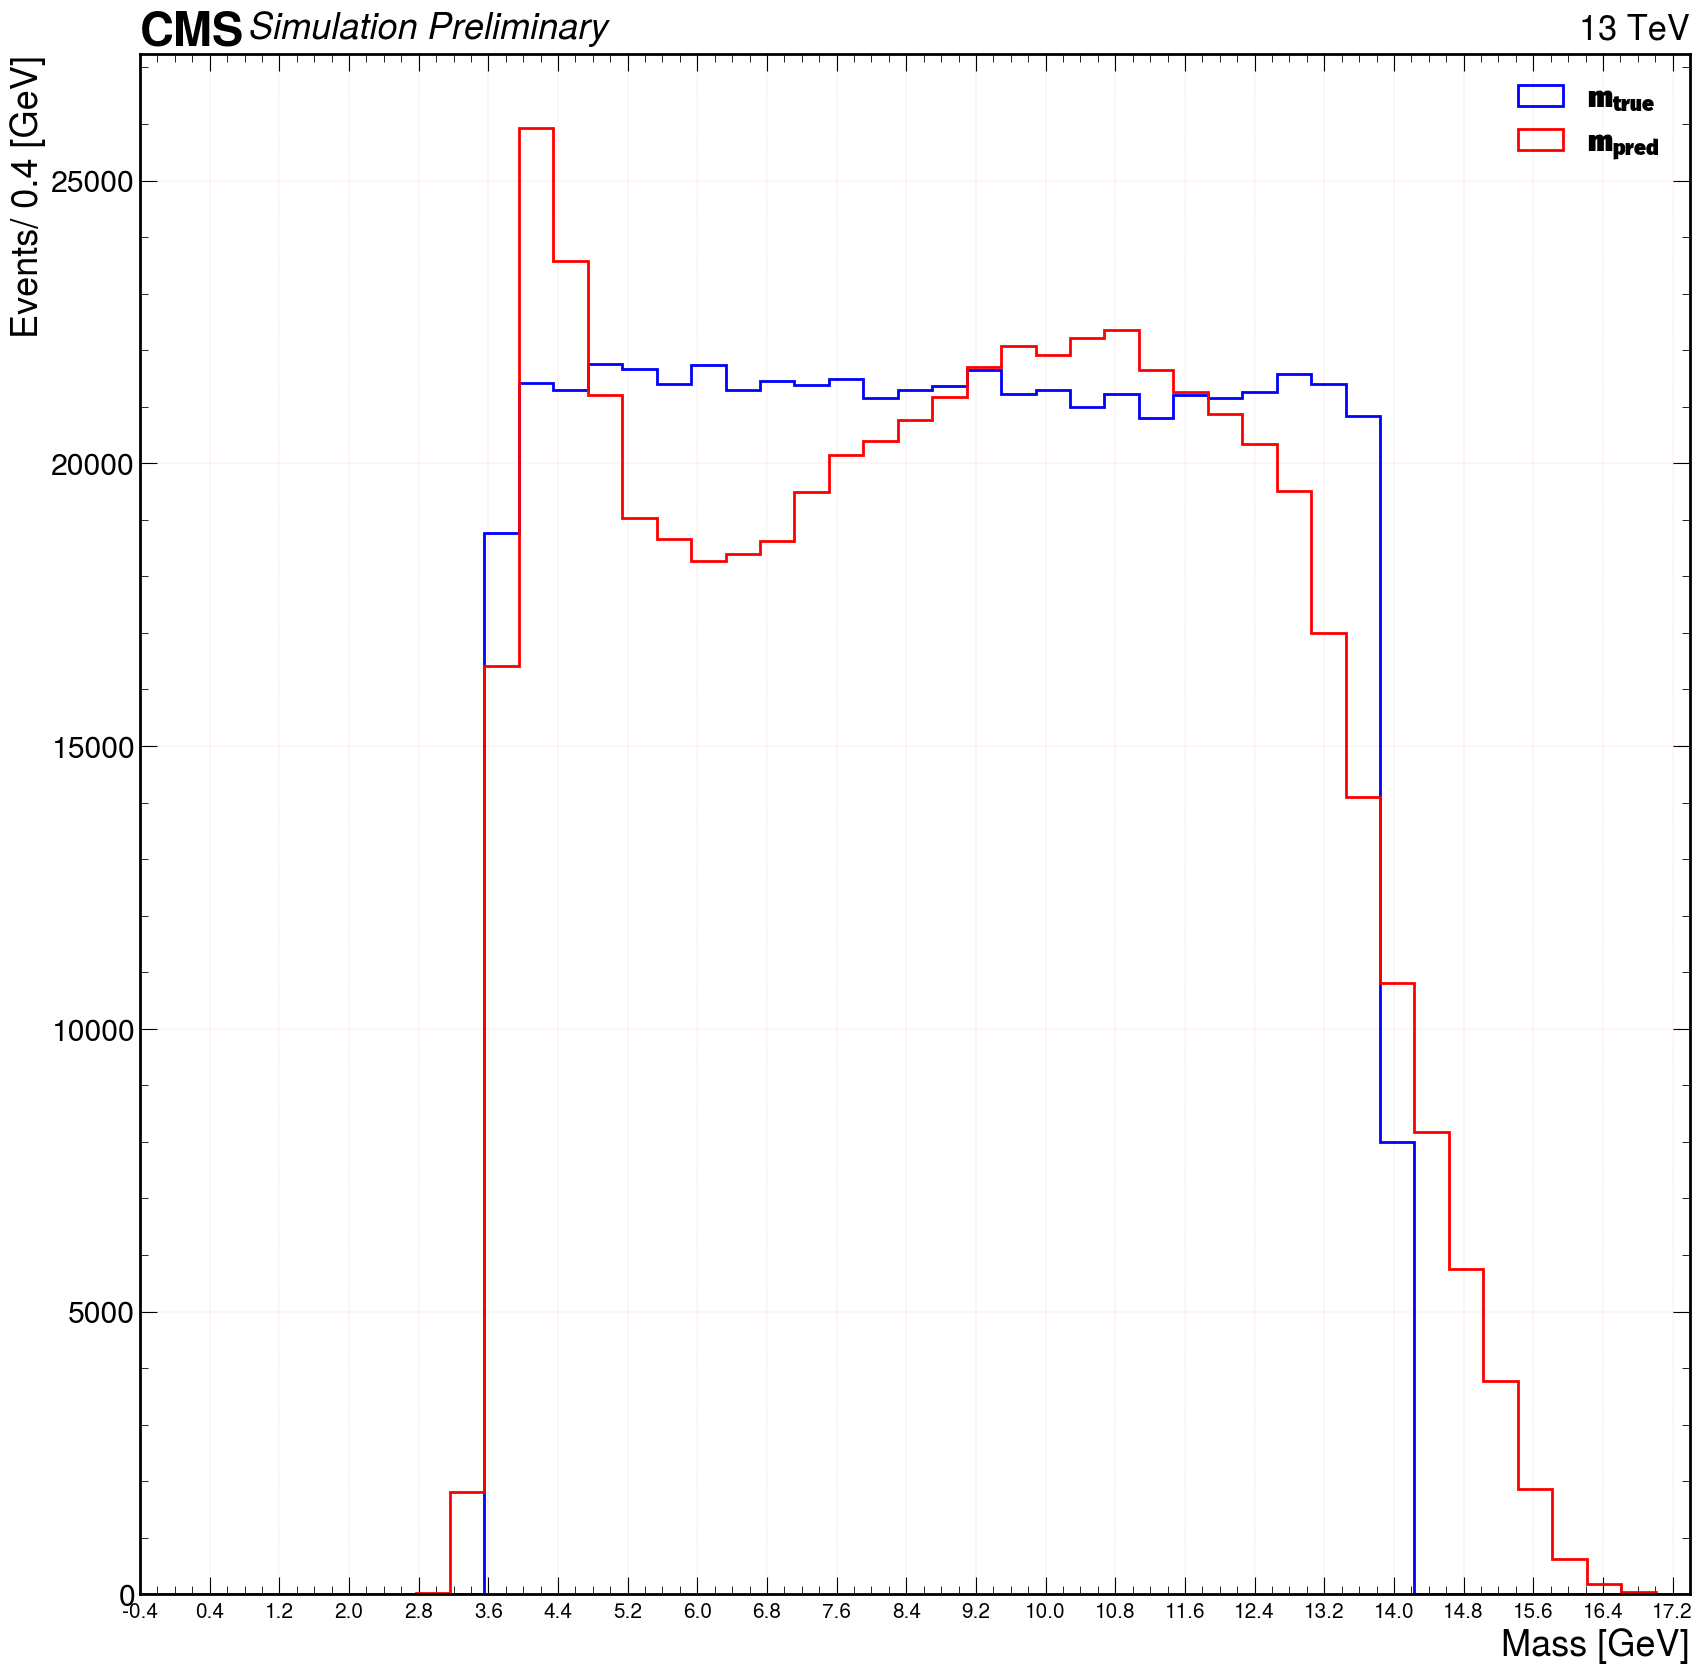

In [6]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 16.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

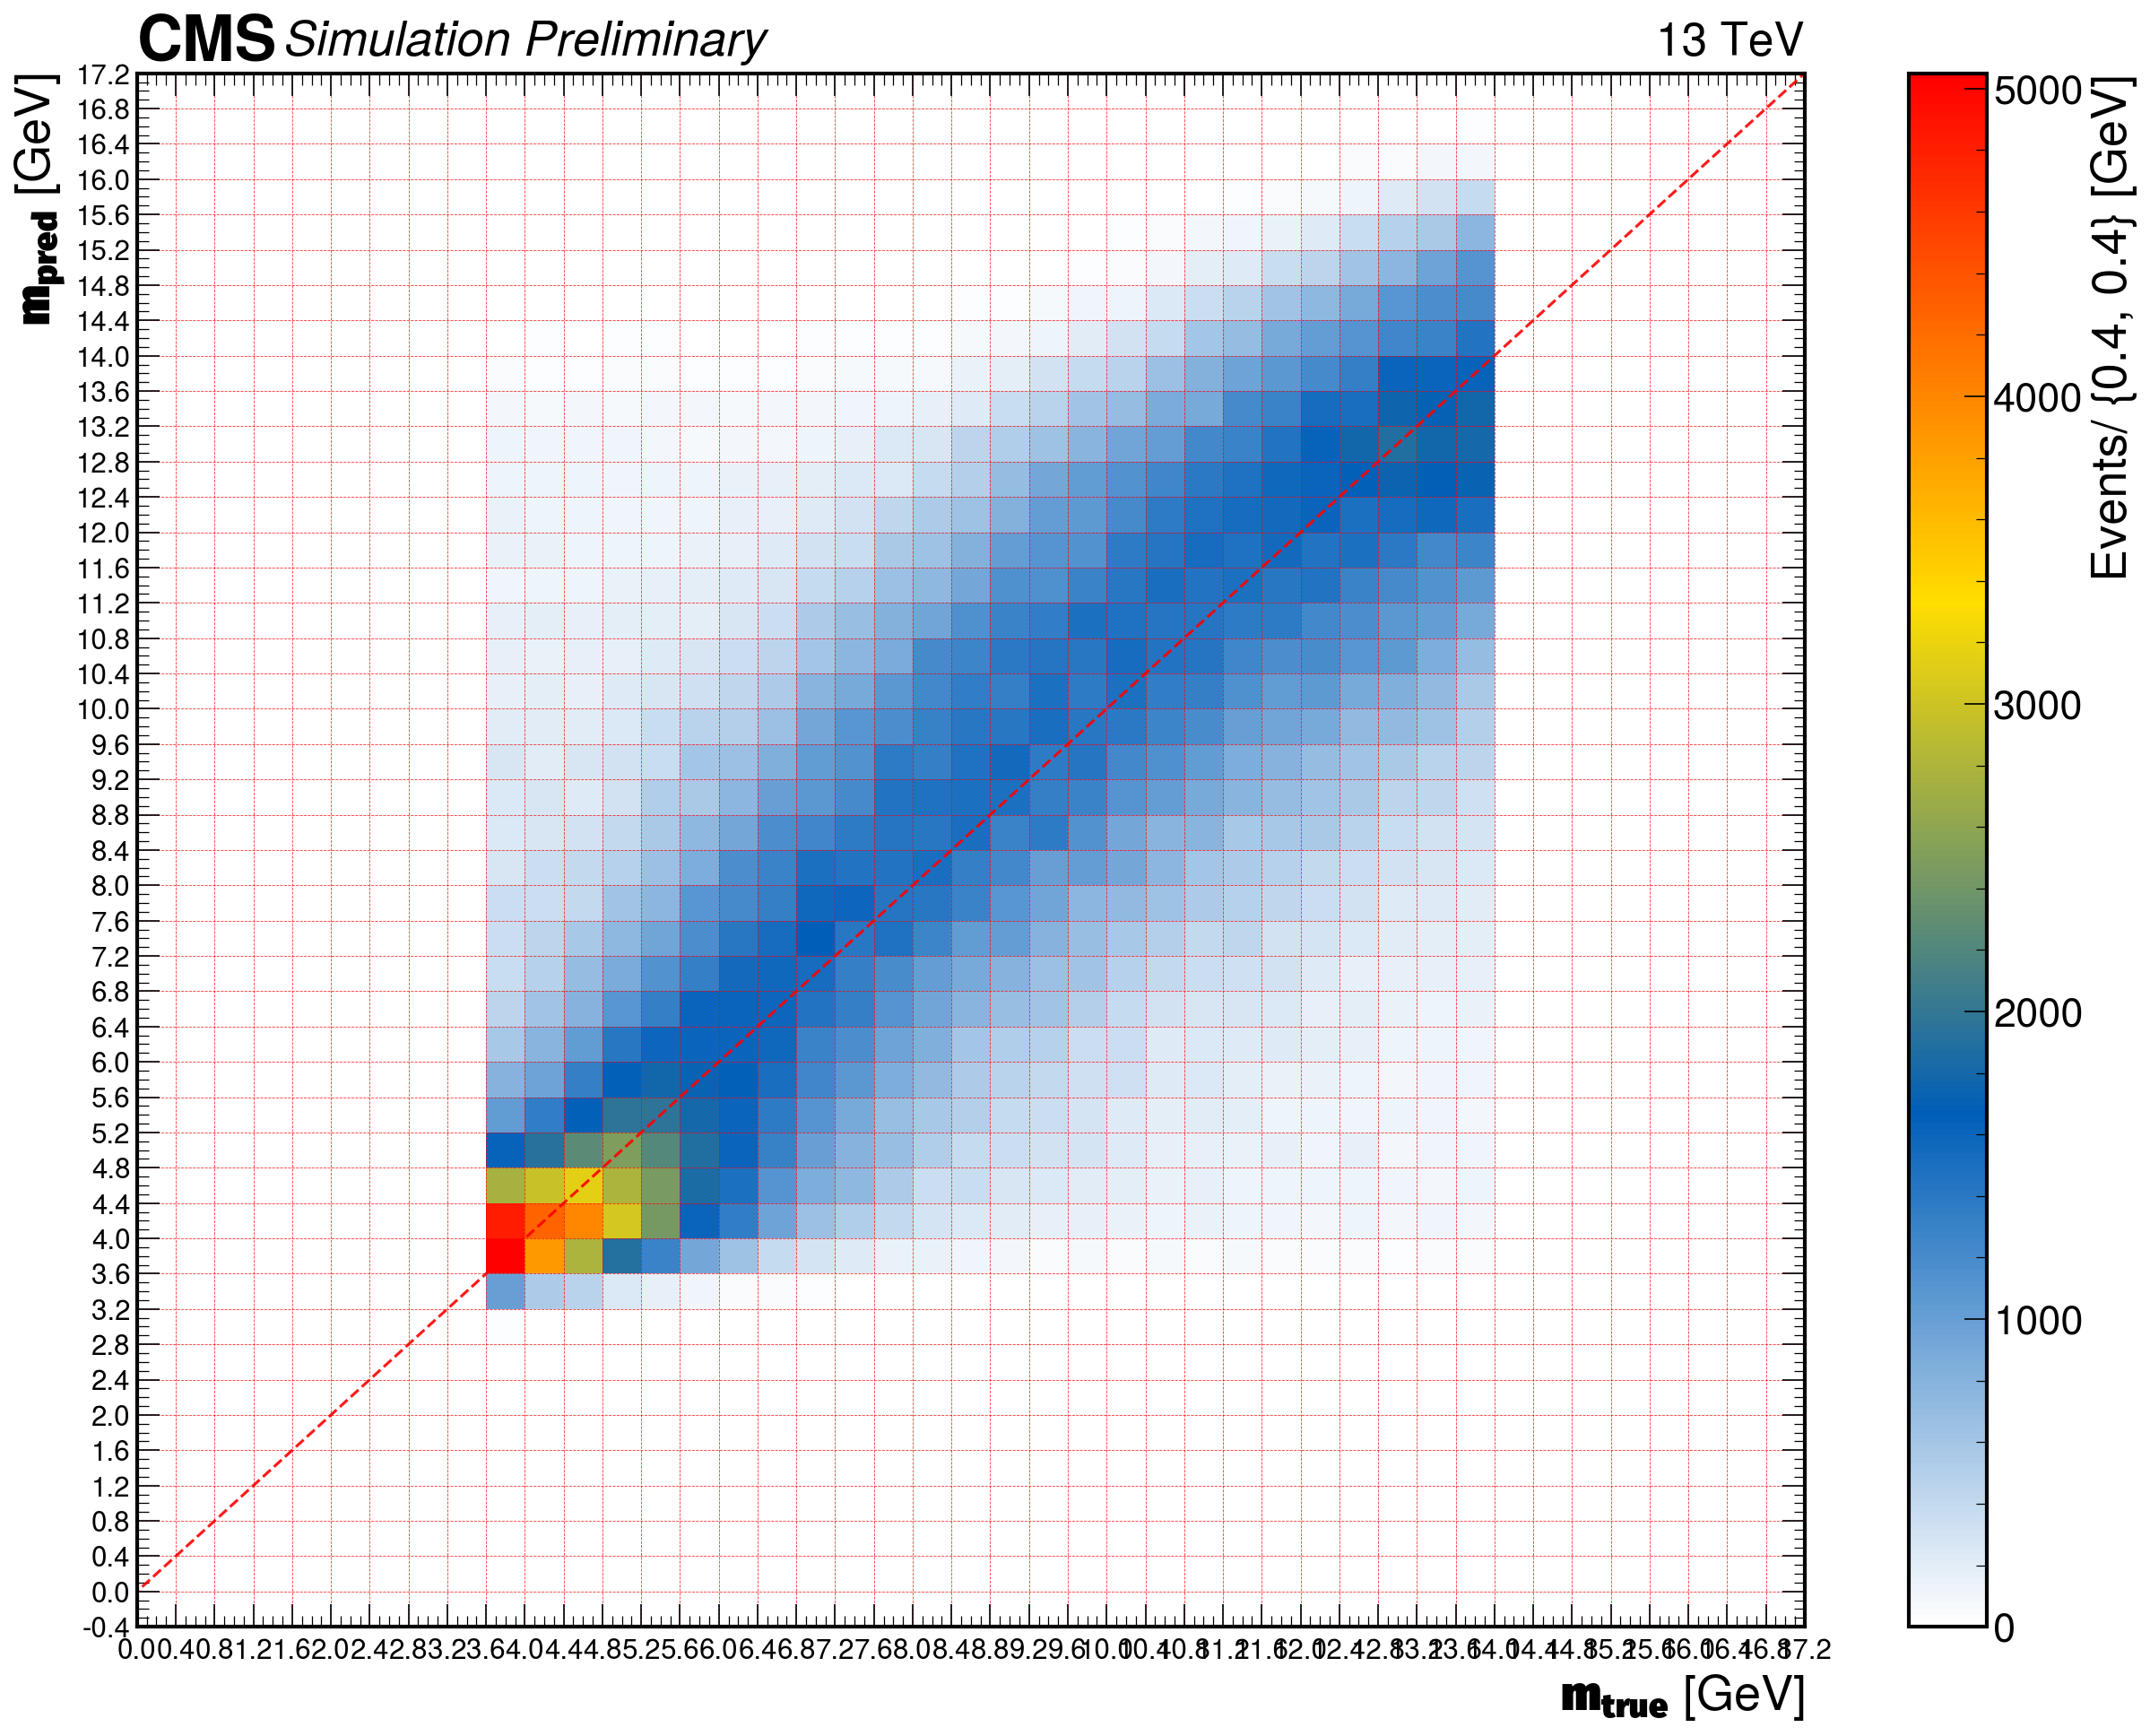

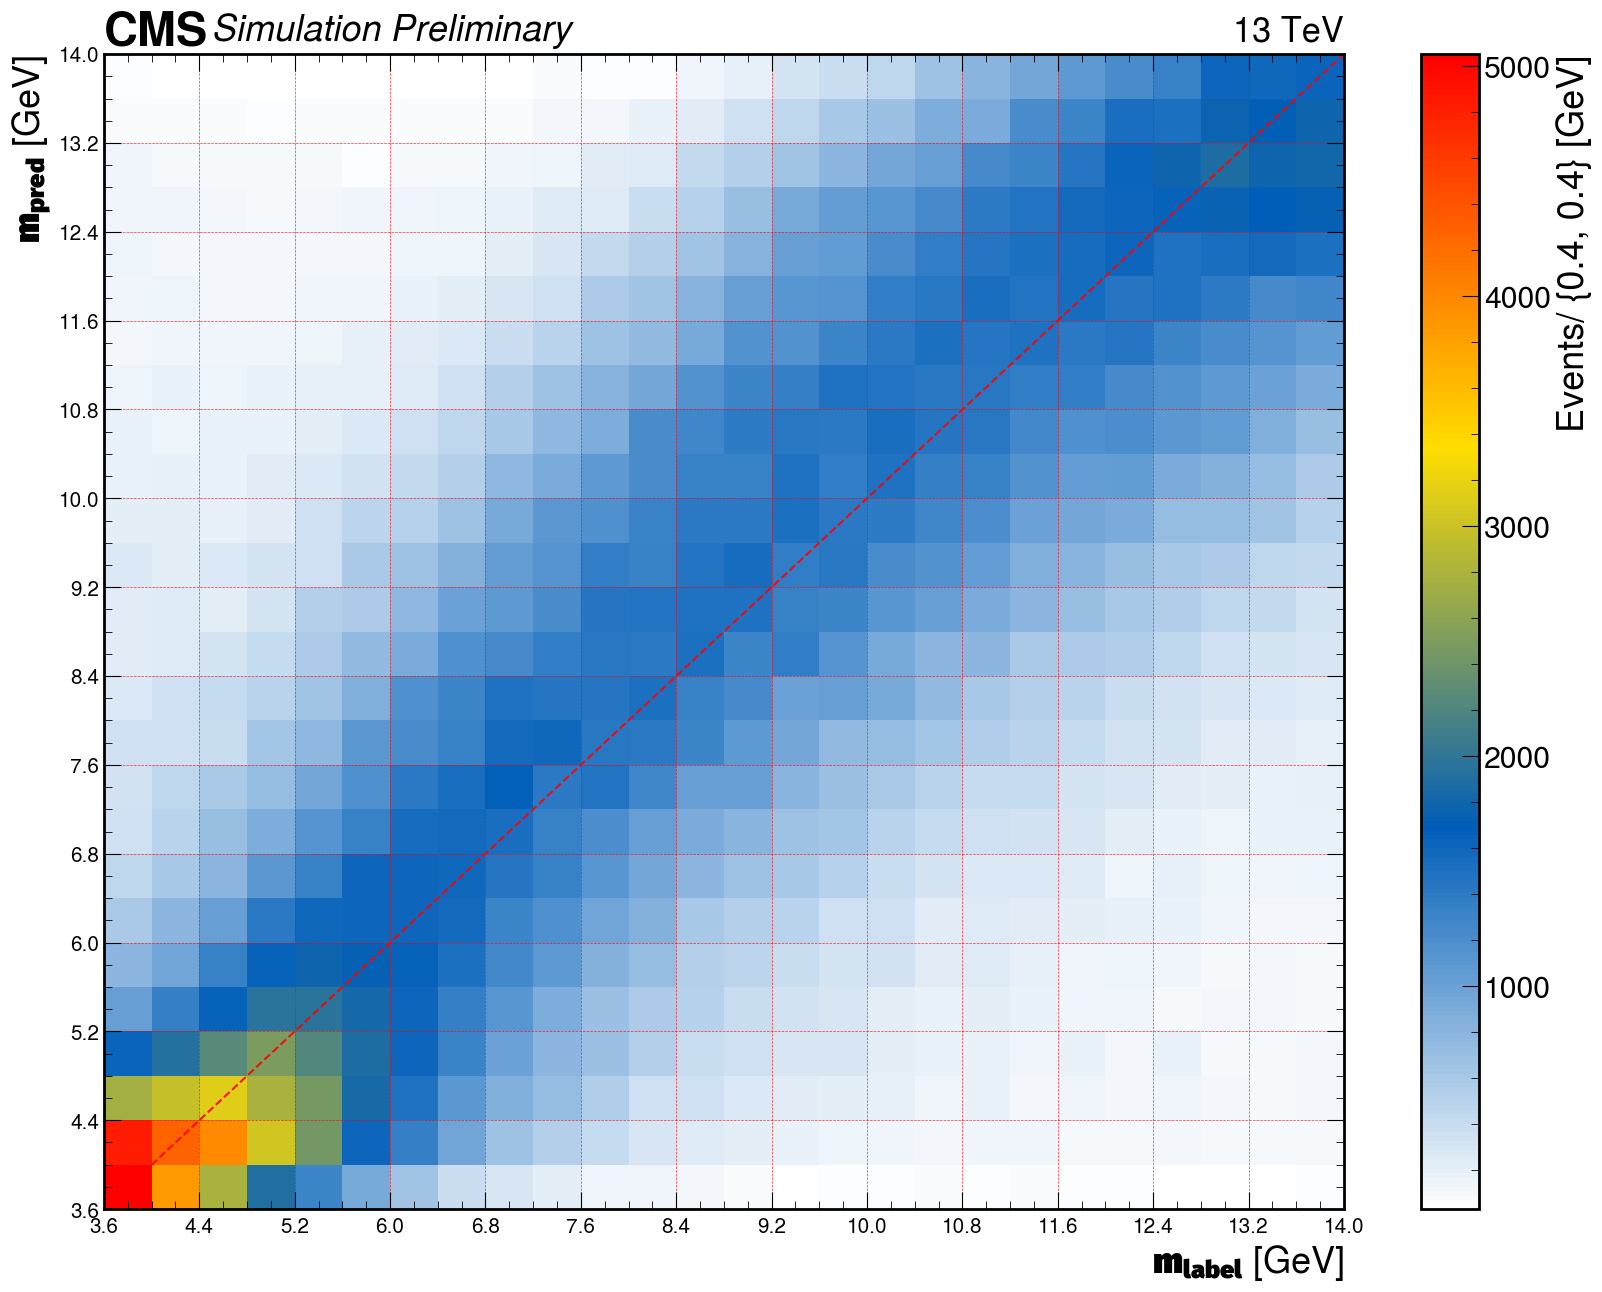

In [7]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .4),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .4),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [8]:
###----------------m3p6To14_noBN[16,32,64,128]-------------------------------------------

In [9]:
!ls mass_trainer_aToTauTau_m3p6To14_with_newModel_noBN/INFERENCE_DATA/

5_channels_aToTauTau_pT30To180_with_mass3p6To14_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from0_ntrain4834304_nval560128_run0


In [15]:
local='/home/bbbam/mass_trainer_aToTauTau_m3p6To14_with_newModel_noBN/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass3p6To14_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from0_ntrain4834304_nval560128_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

14 files found


In [52]:
epoch=3

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m3p6To14_with_newModel_noBN/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass3p6To14_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from0_ntrain4834304_nval560128_run0/epoch3_val_pseudoscalar_mae1.7049_inference_data.pkl


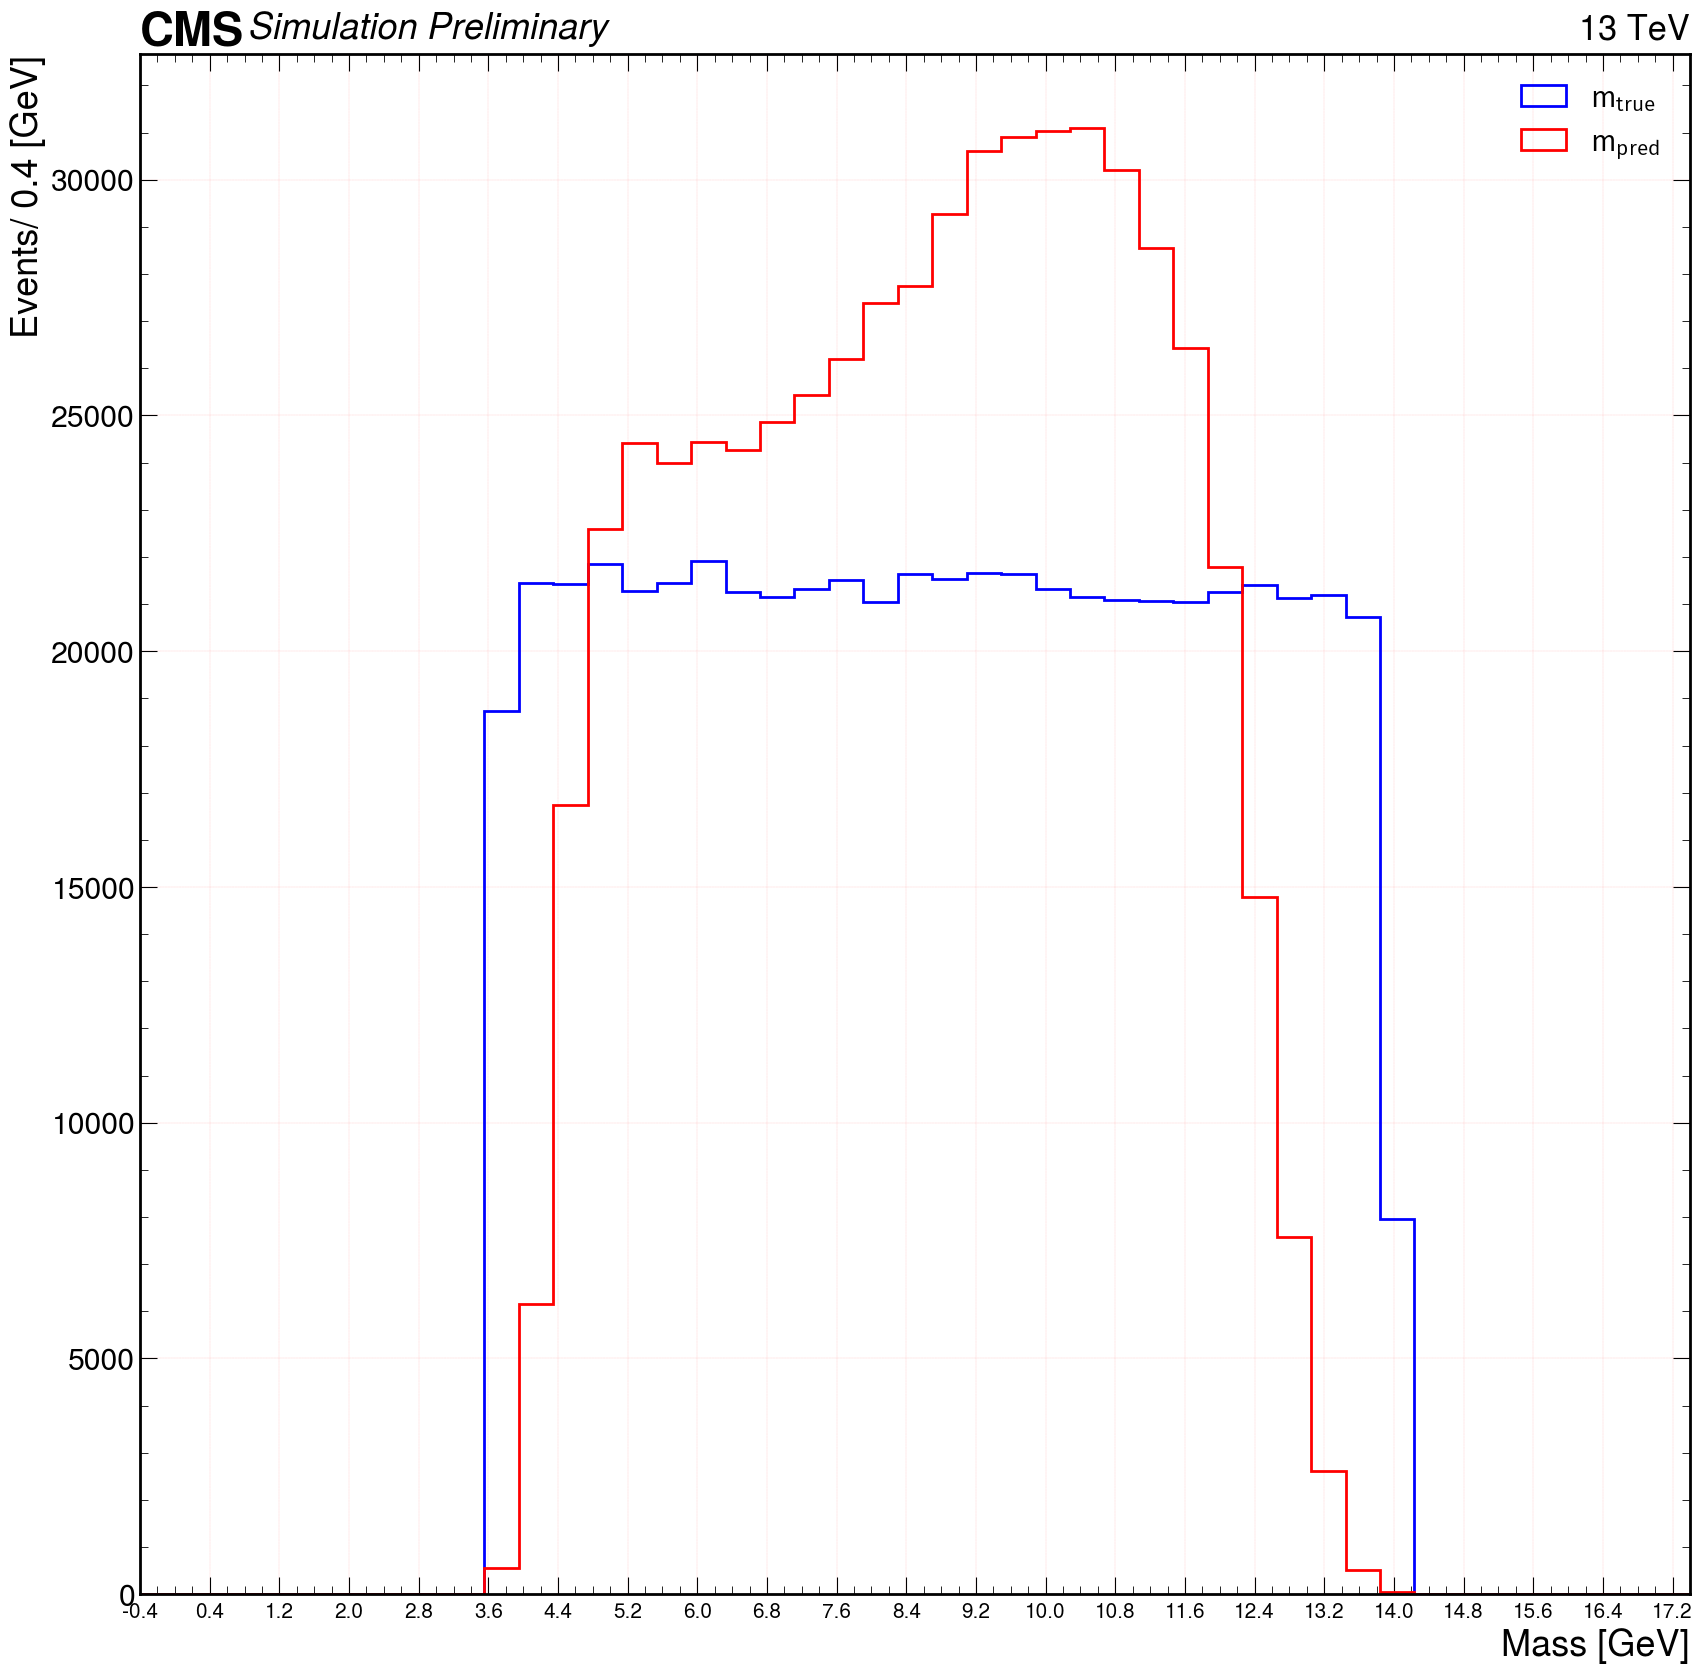

In [53]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 16.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

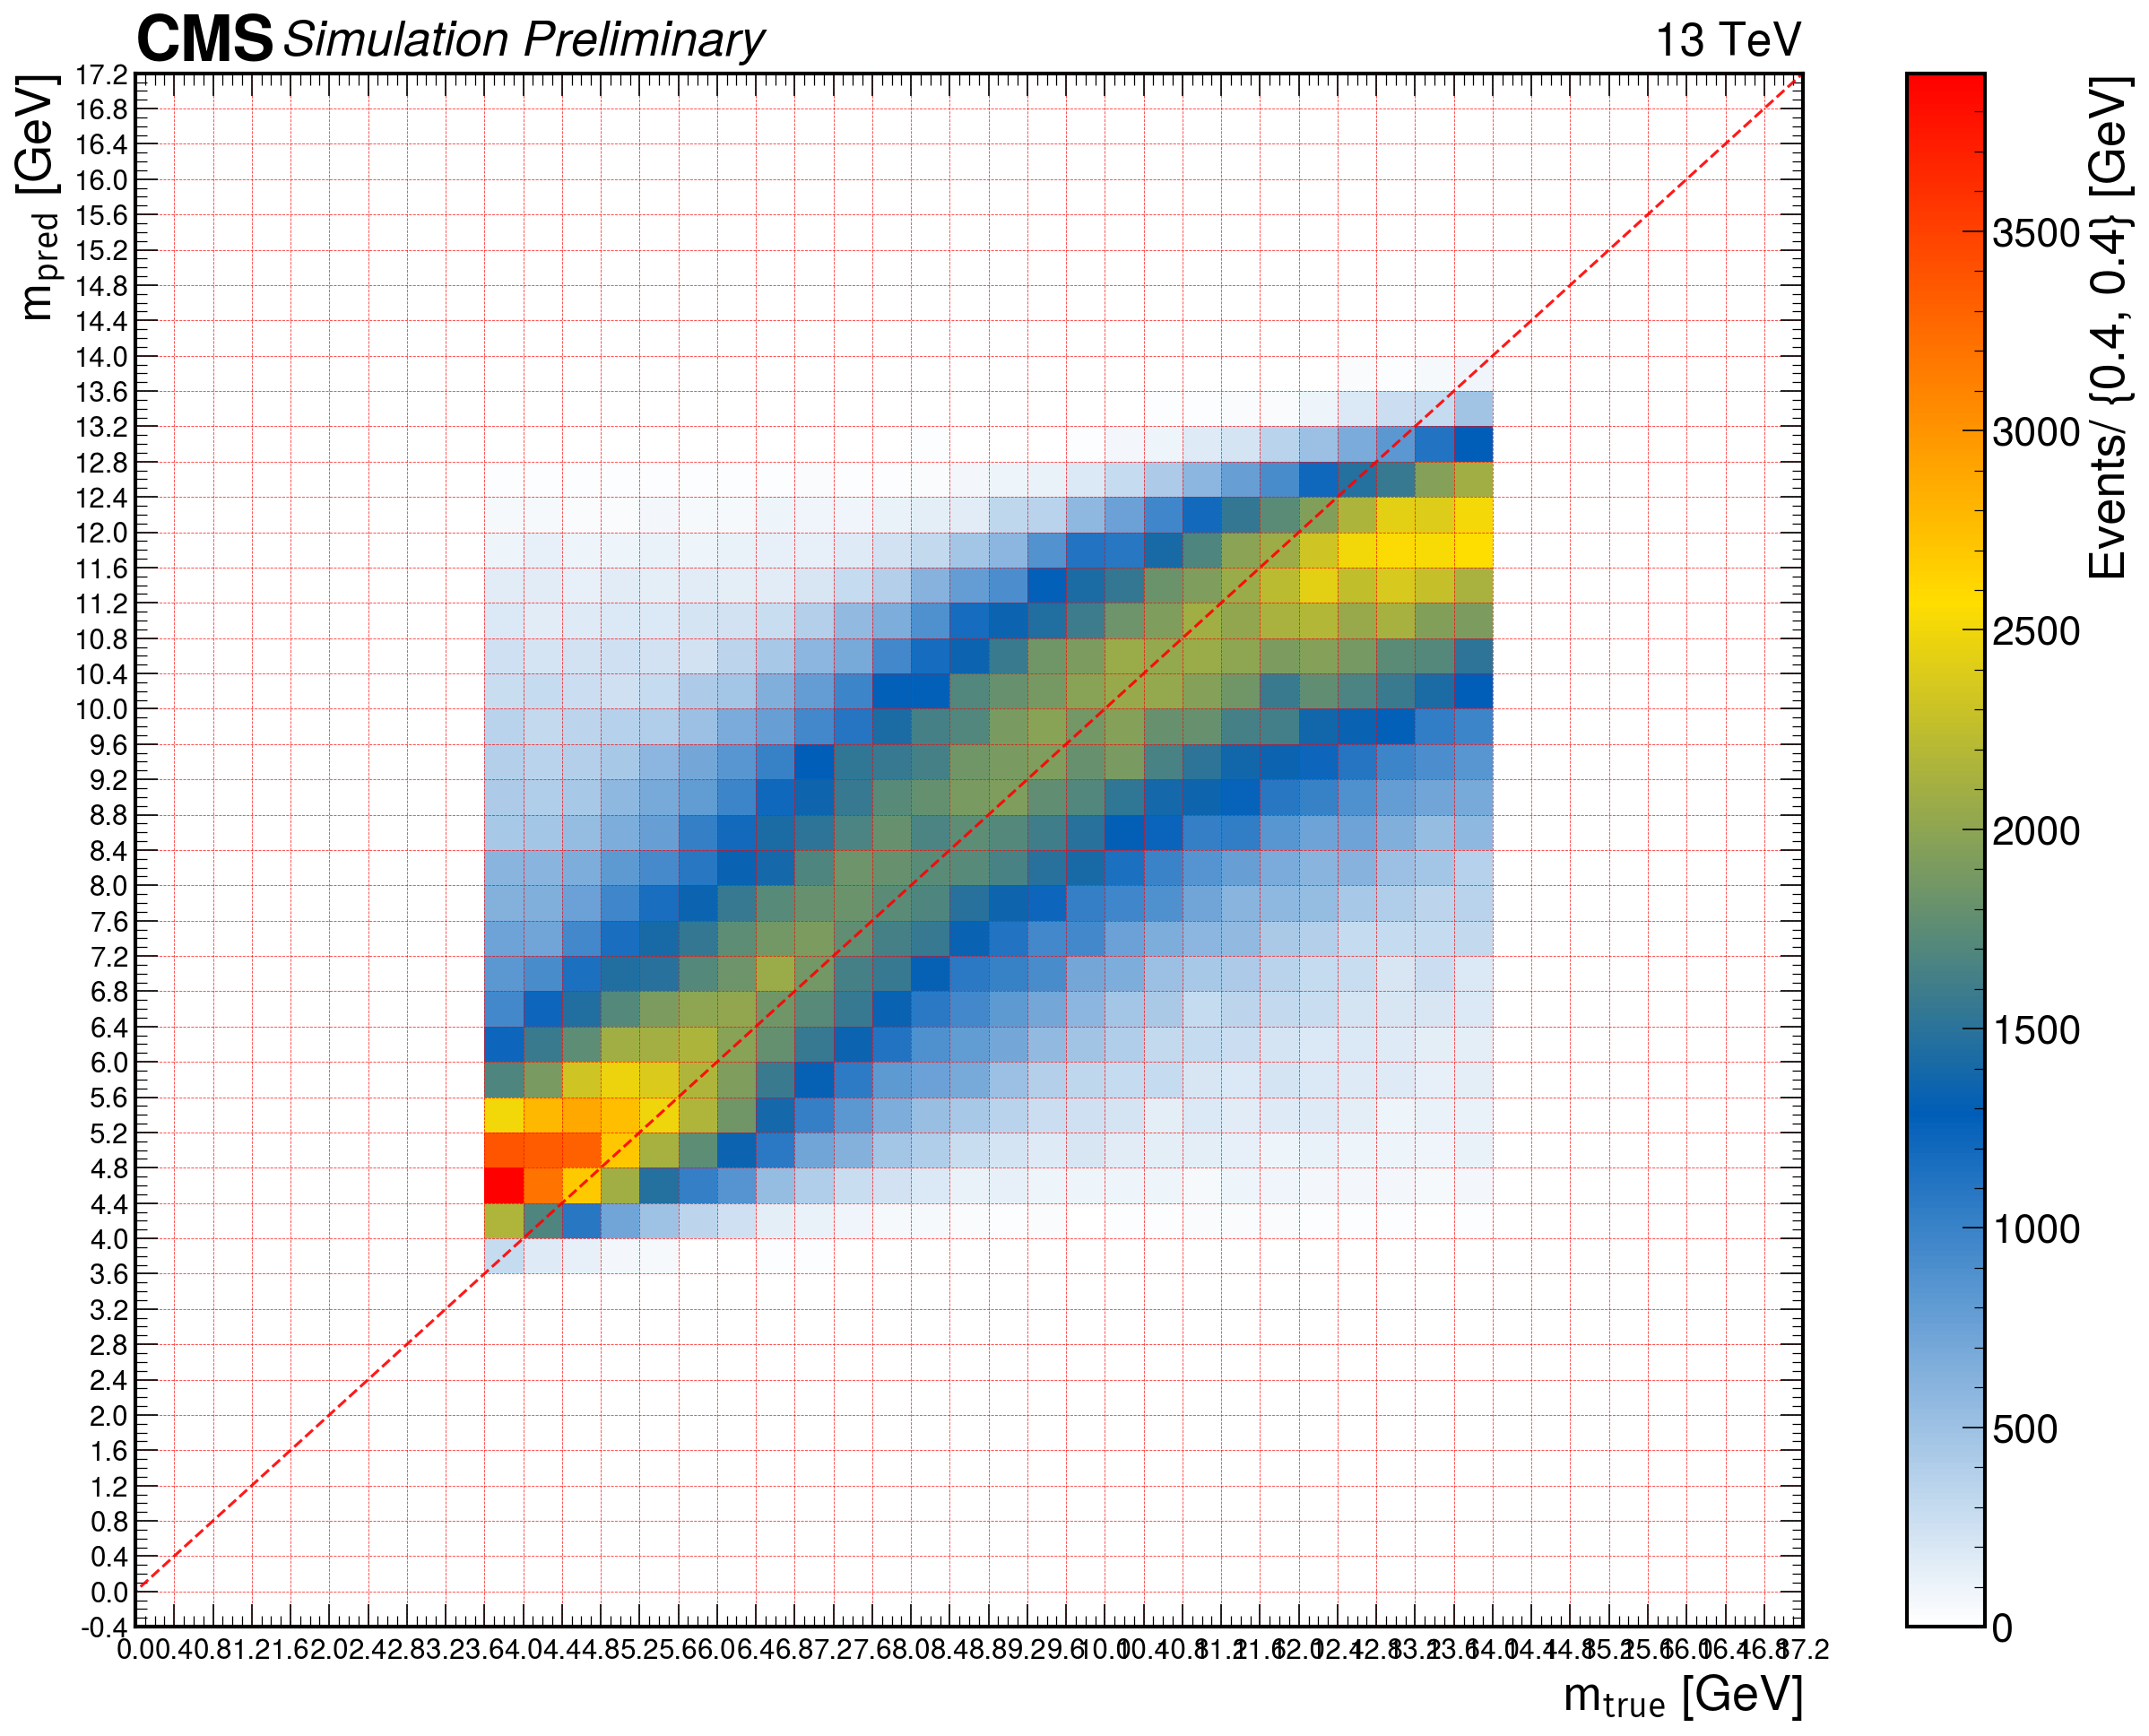

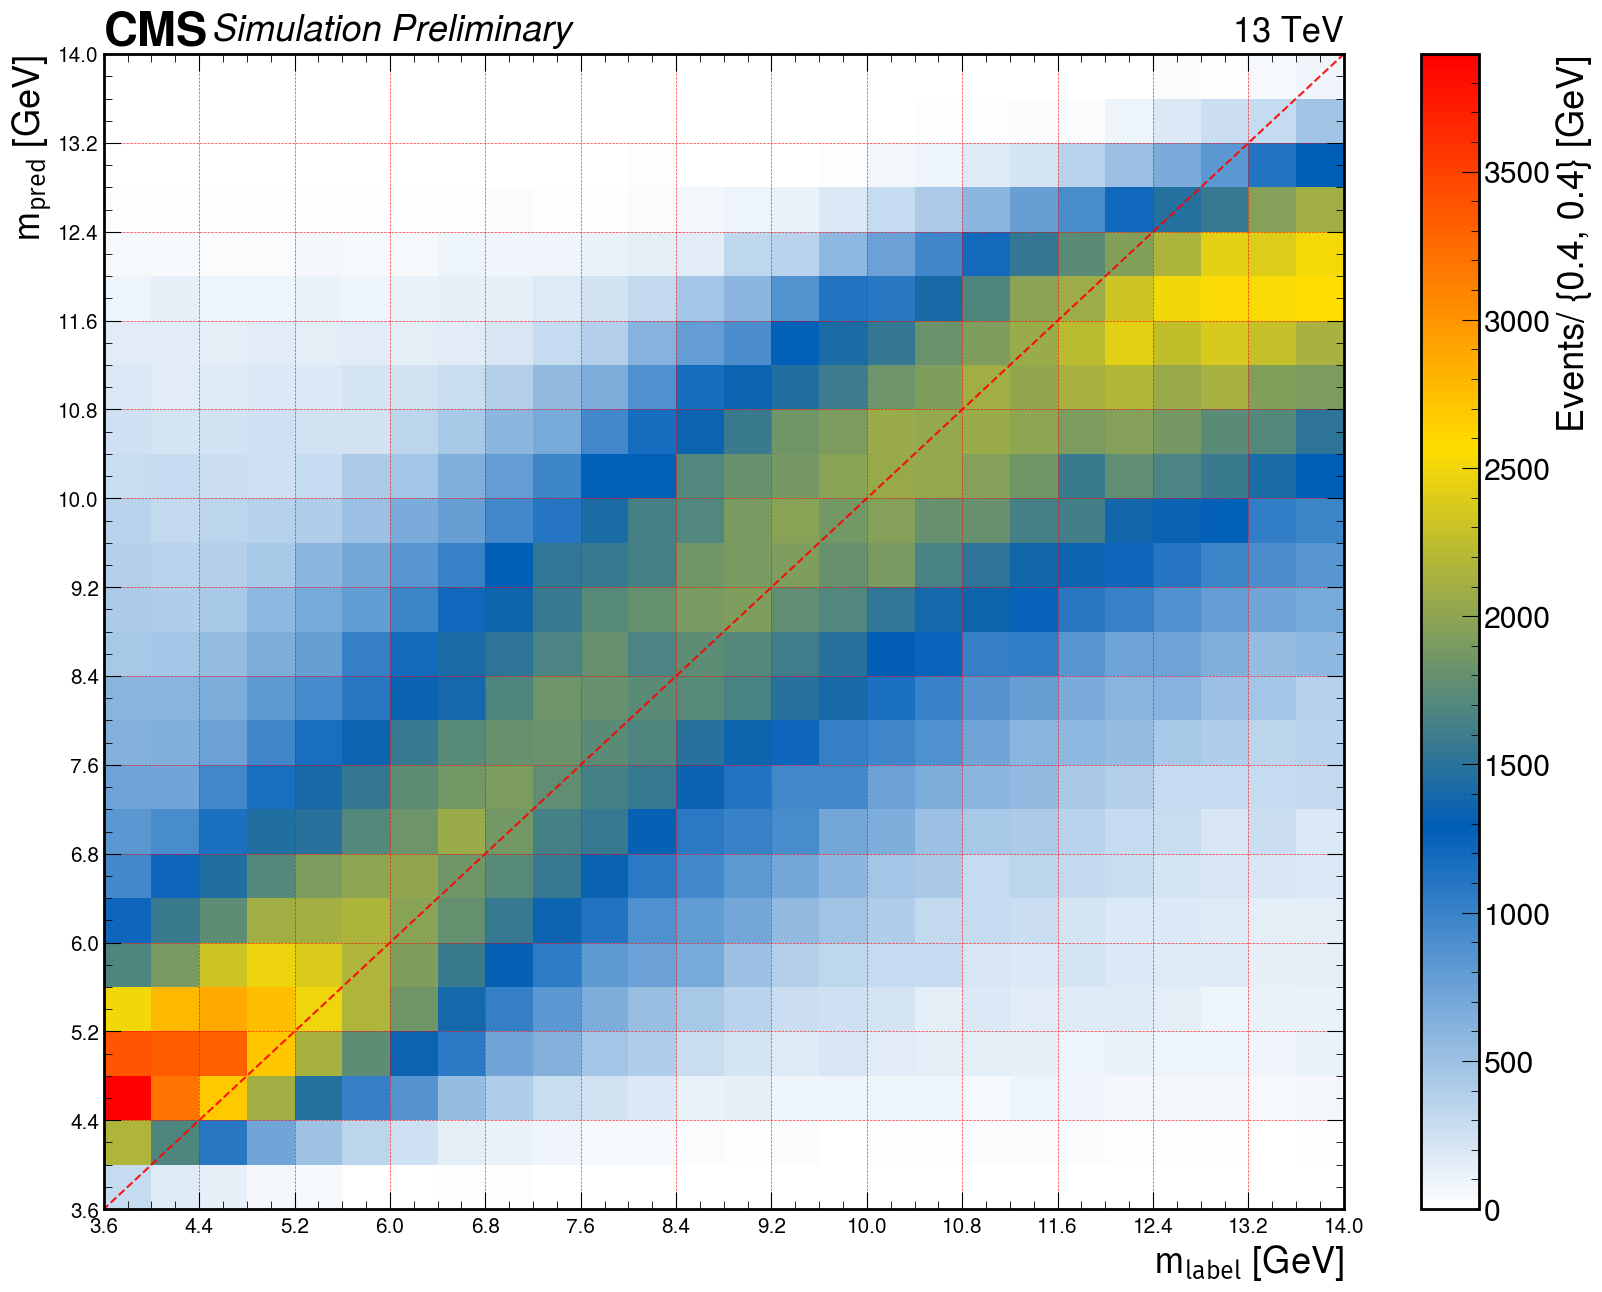

In [54]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .4),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .4),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

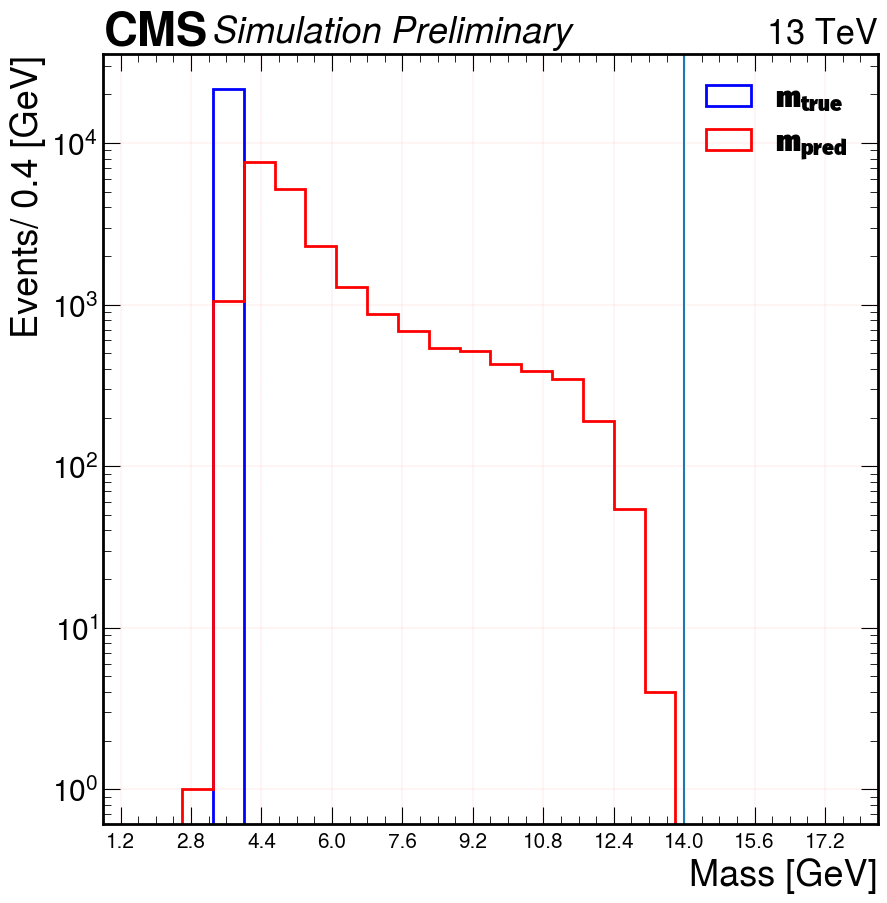

In [14]:
m_true, m_pred = [], []
for i in range(len(m_true_)):
    if m_true_[i]<3.6 or m_true_[i] >4 :continue
    m_true.append(m_true_[i])
    m_pred.append(m_pred_[i])
    
bin_size=.4
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(np.squeeze(m_true), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2,log=1)
plt.hist(np.squeeze(m_pred), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2,log=1)
plt.xlim(1.2-bin_size,18+bin_size)
plt.xticks(np.arange(1.2,18+bin_size,1.6),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]' )
plt.axvline(x=14)
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()    
        

In [ ]:
#--m3p6T017p2-----------------

In [11]:
local='/home/bbbam/mass_trainer_aToTauTau_m3p6To17p2_with_newModel_noBN/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass3p6To17p2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from0_ntrain6084608_nval560128_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

12 files found


In [12]:
epoch=12

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m3p6To17p2_with_newModel_noBN/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass3p6To17p2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from0_ntrain6084608_nval560128_run0/epoch12_val_pseudoscalar_mae1.6976_inference_data.pkl


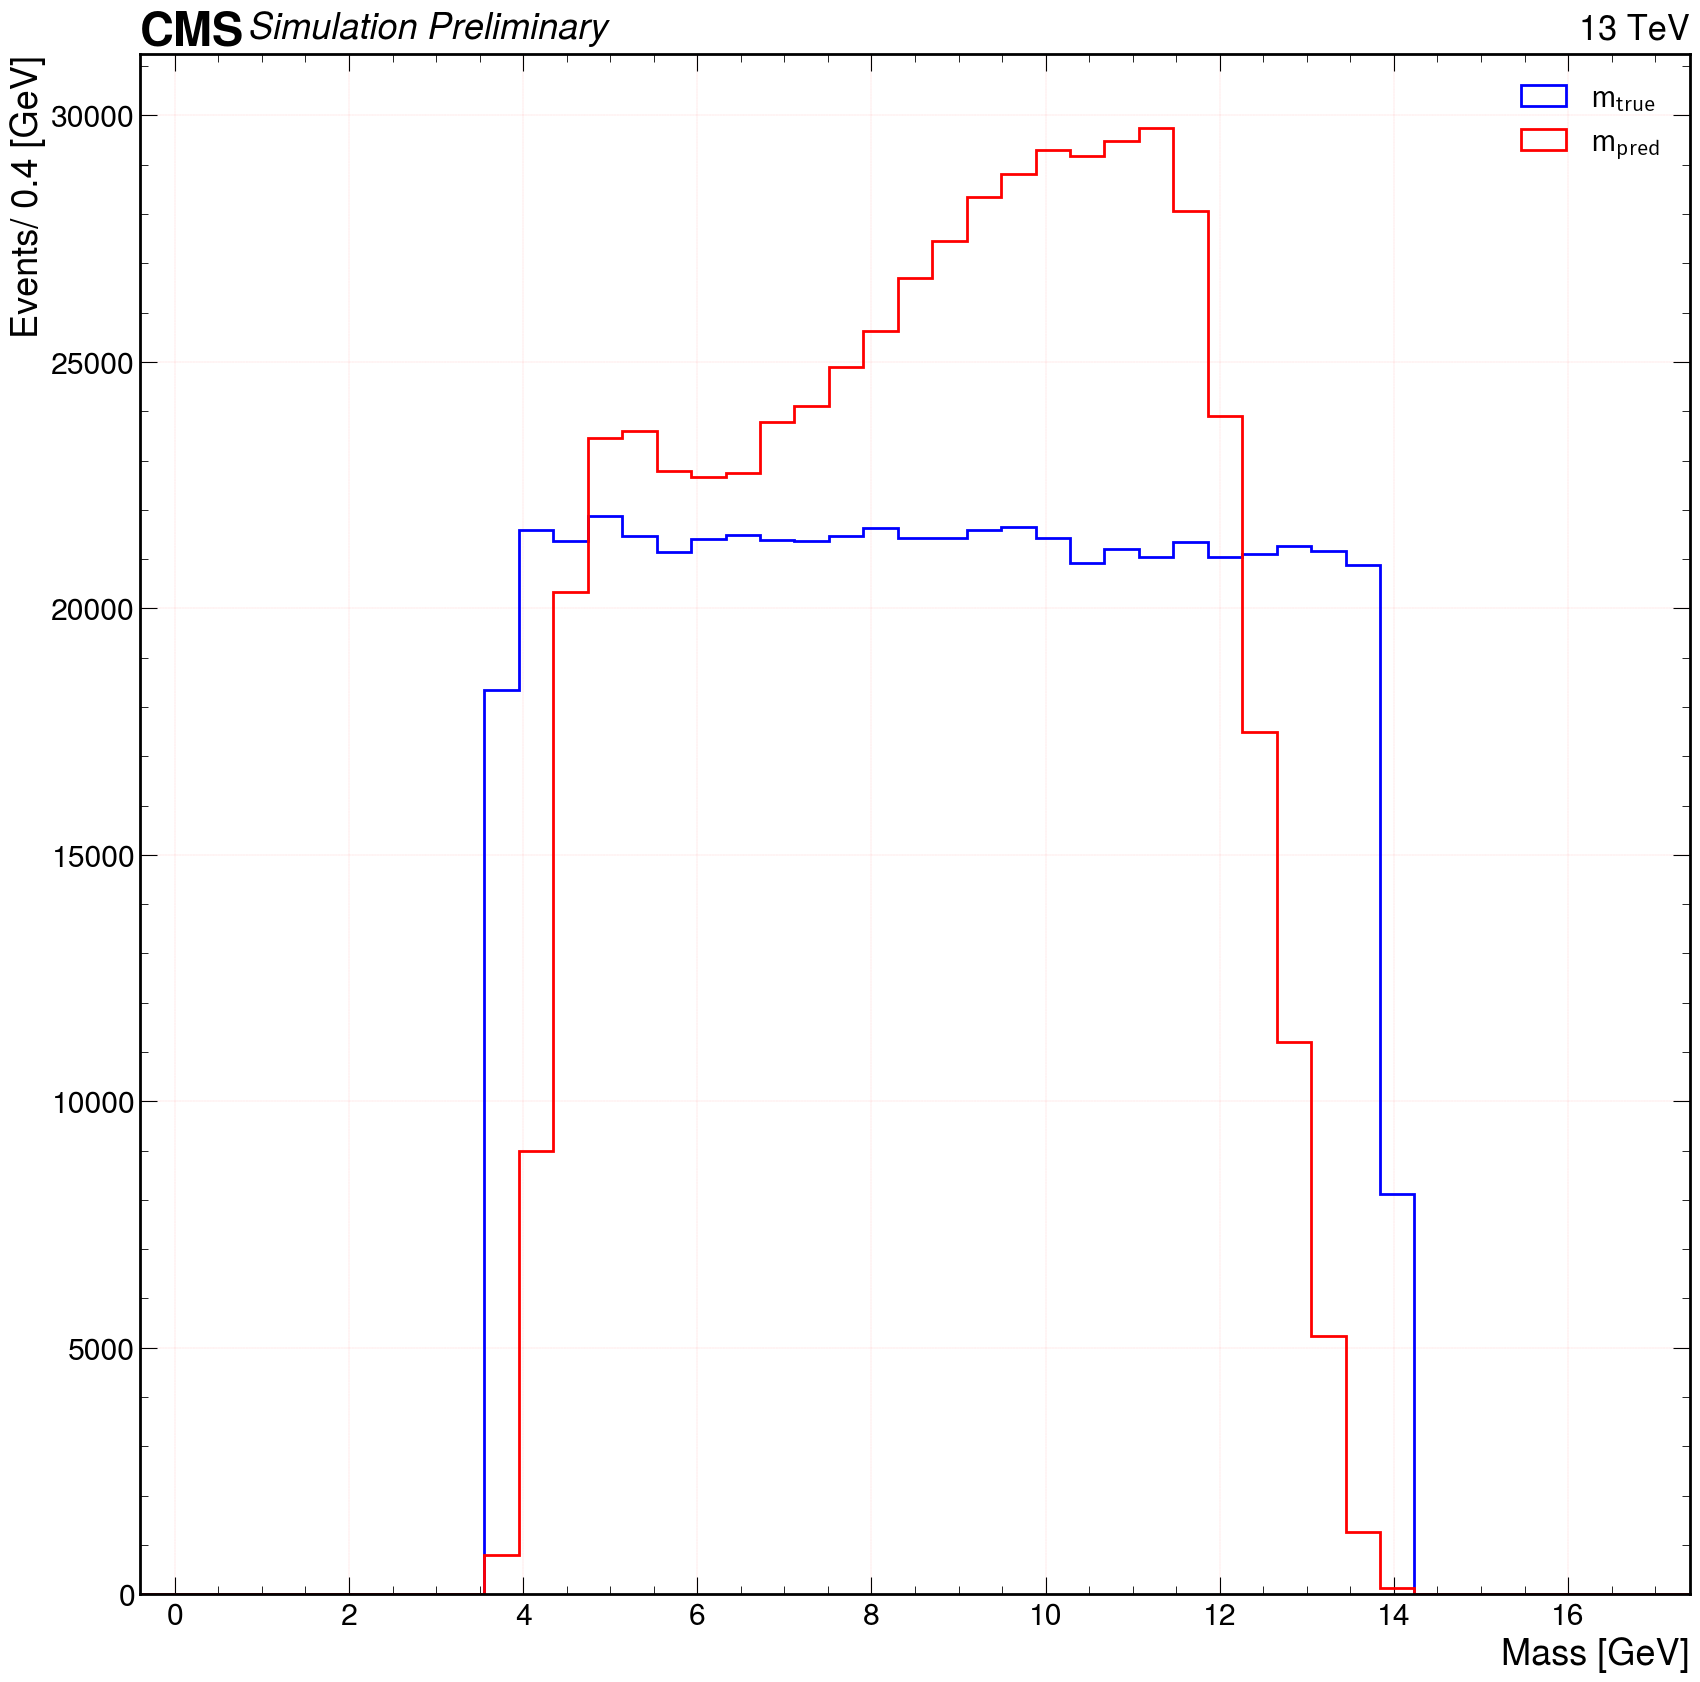

In [51]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 16.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

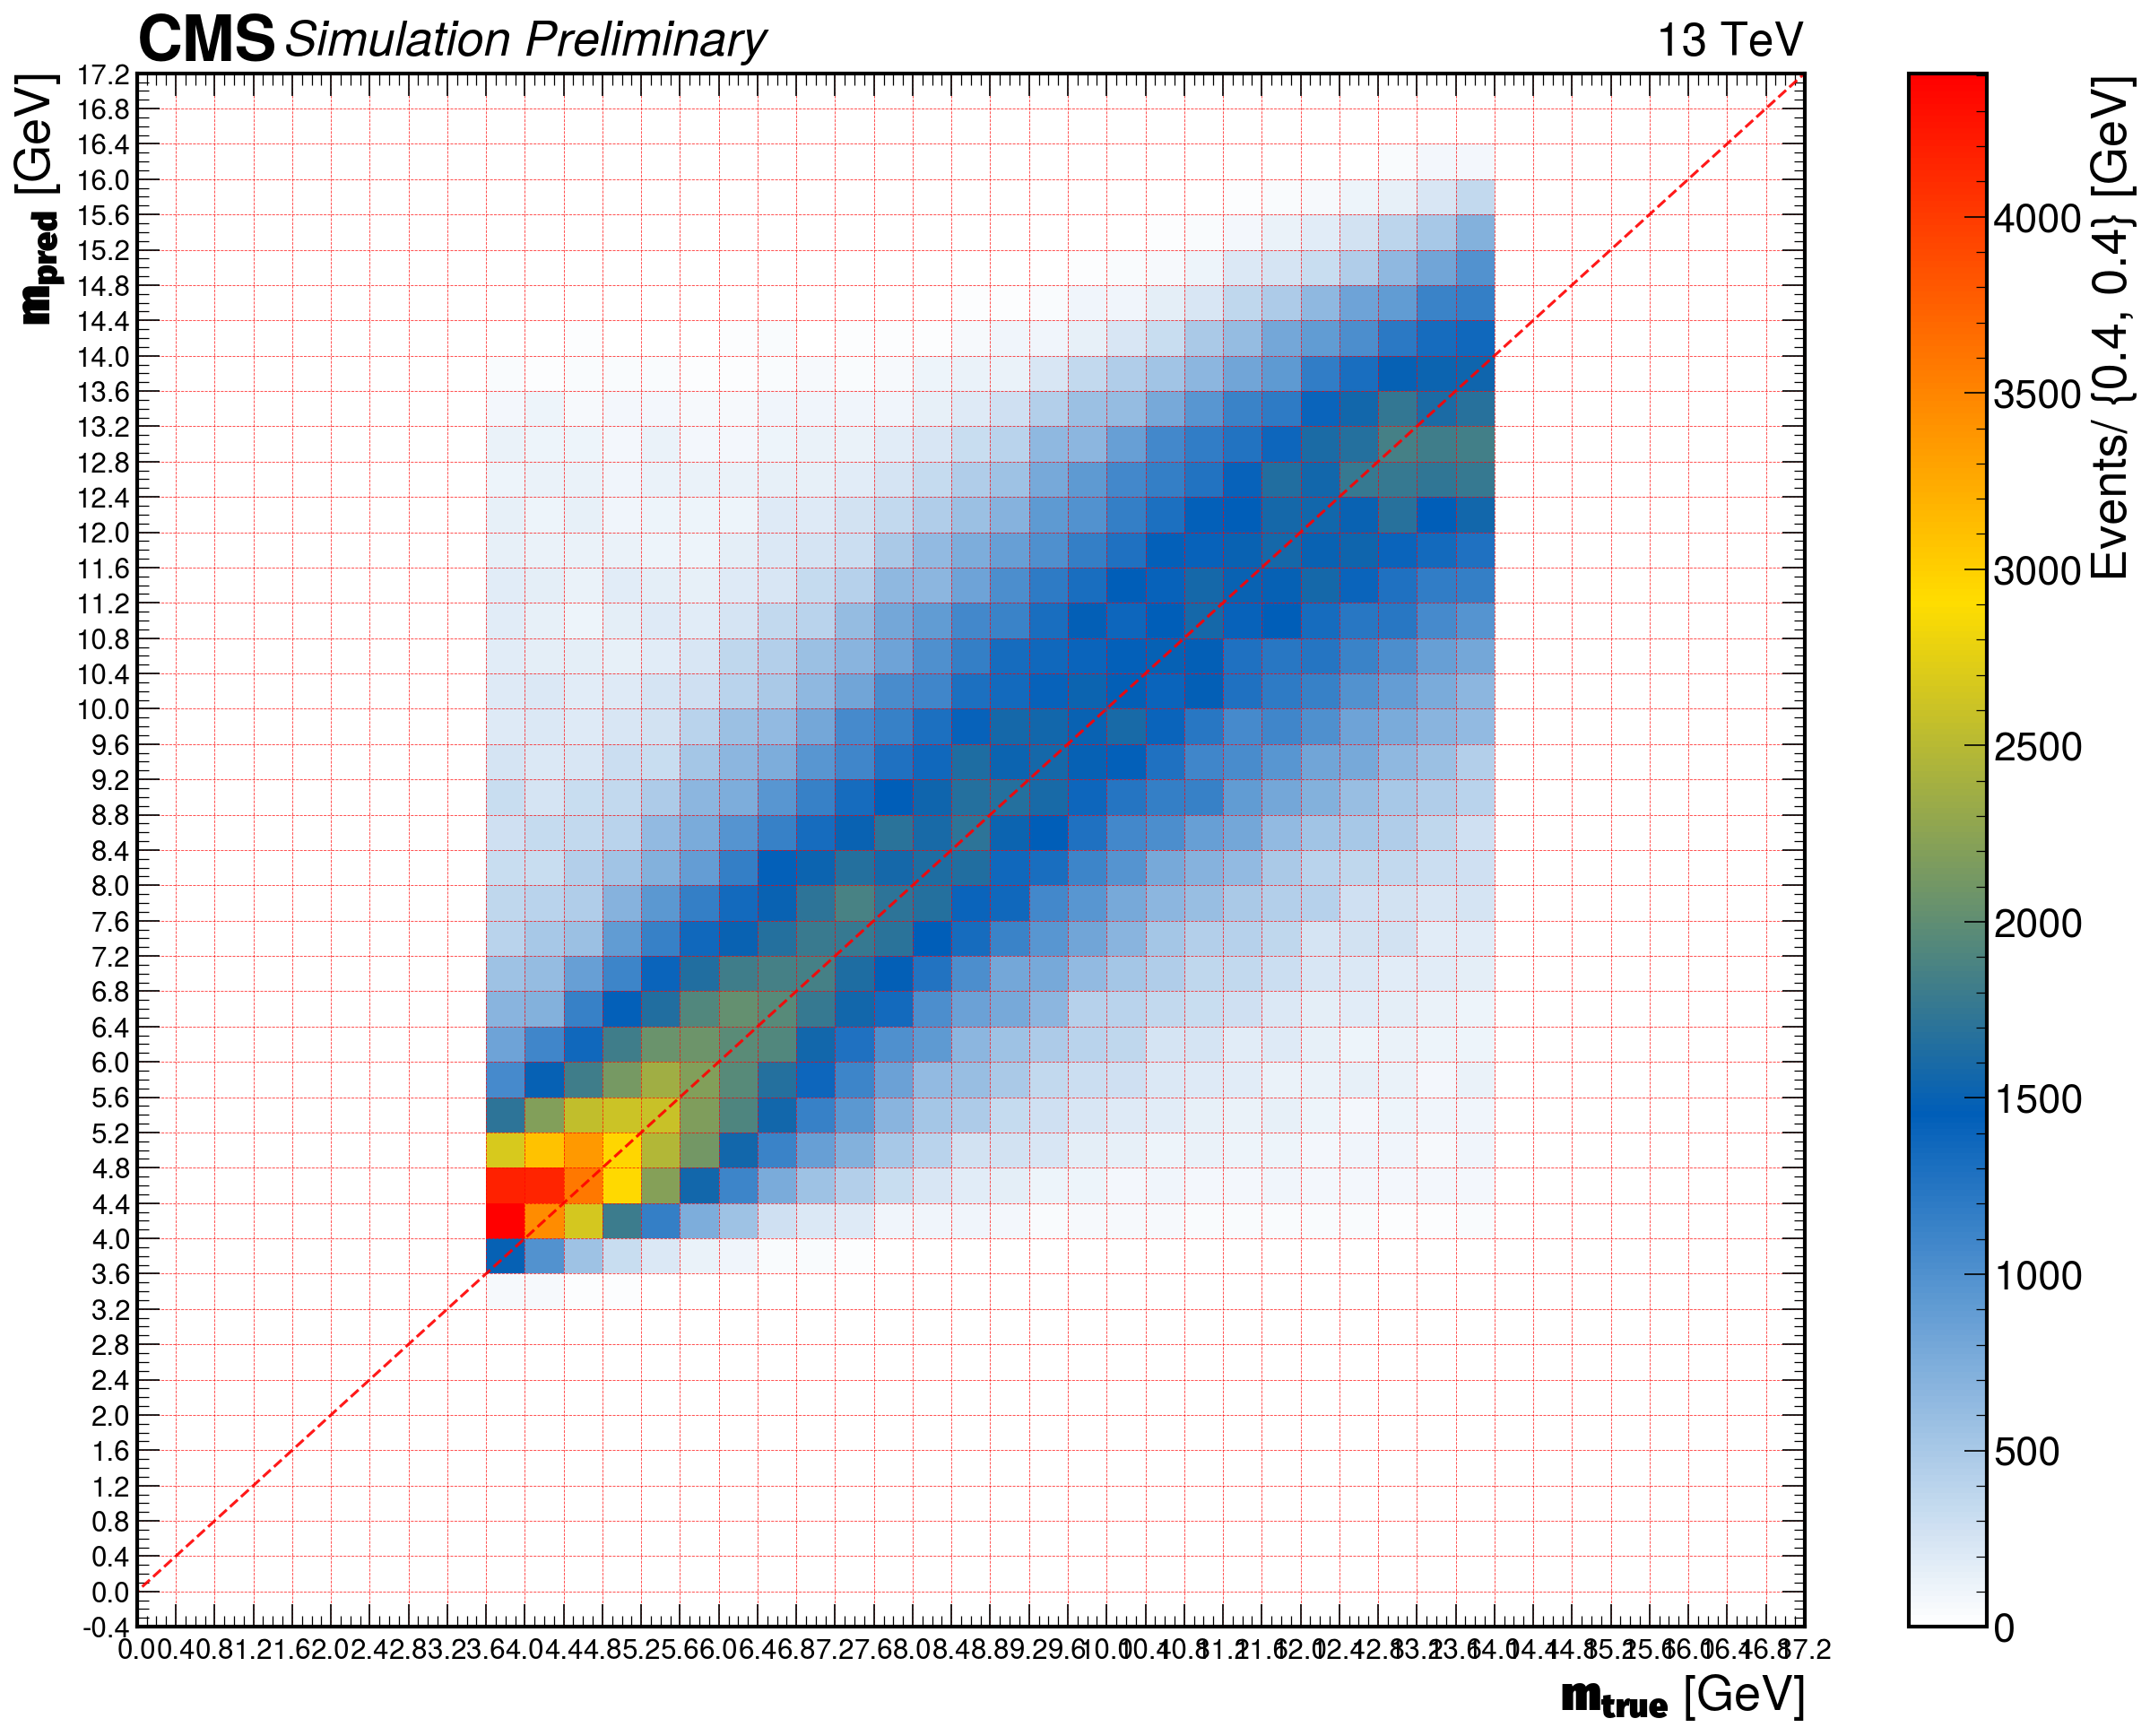

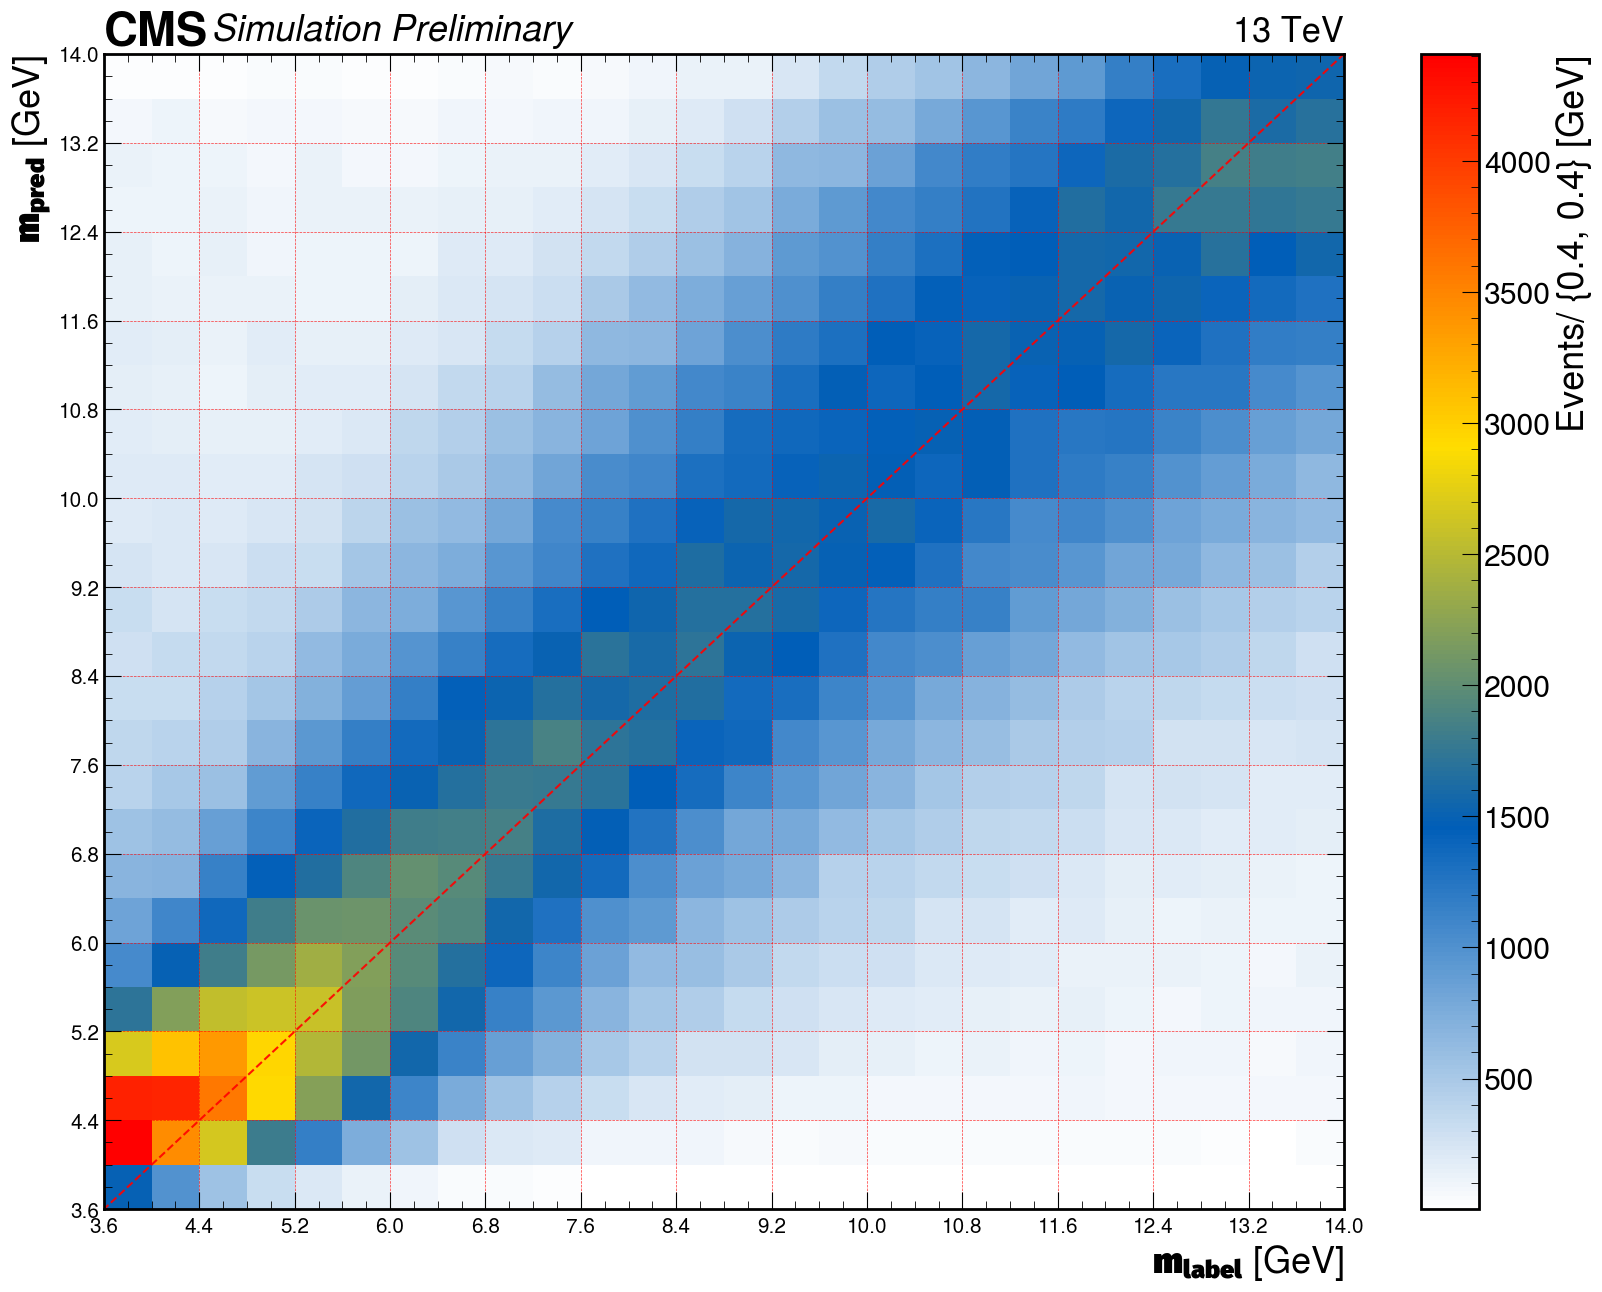

In [19]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .4),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .4),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [1]:
#--m1p2T017p2 with 2 unphysical files-----------------

In [17]:
local='/home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_less_unphysical_only_2files_newModel_noBN/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_less_low_only2files_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from0_ntrain6240256_nval560128_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

11 files found


In [14]:
epoch=11

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_less_unphysical_only_2files_newModel_noBN/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_less_low_only2files_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs20_BatchSize1024_from0_ntrain6240256_nval560128_run0/epoch11_val_pseudoscalar_mae1.7096_inference_data.pkl


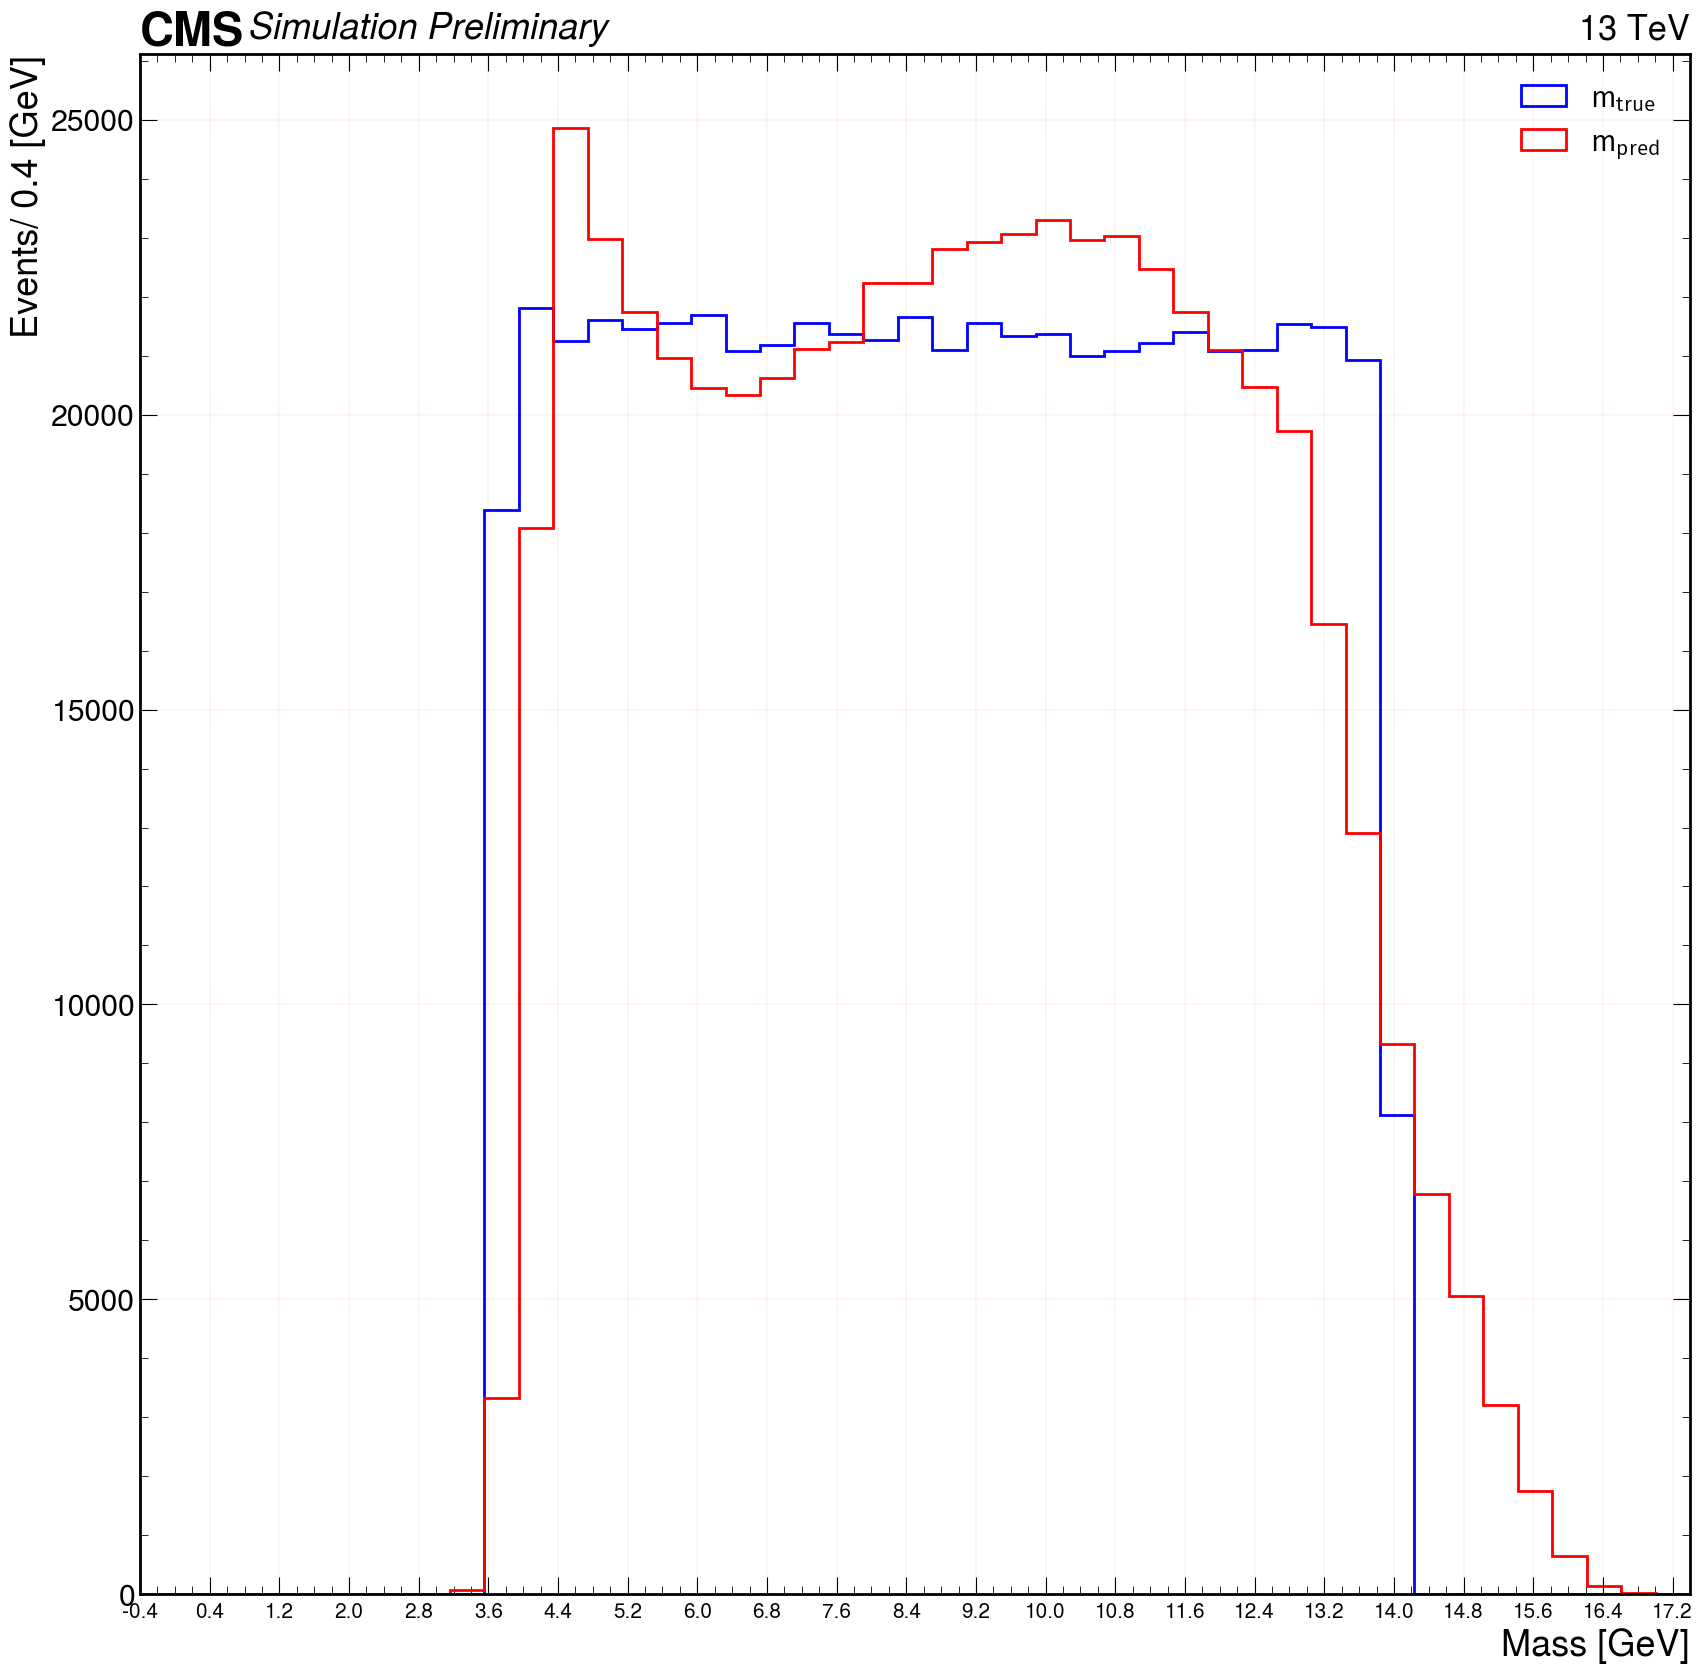

In [15]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 16.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

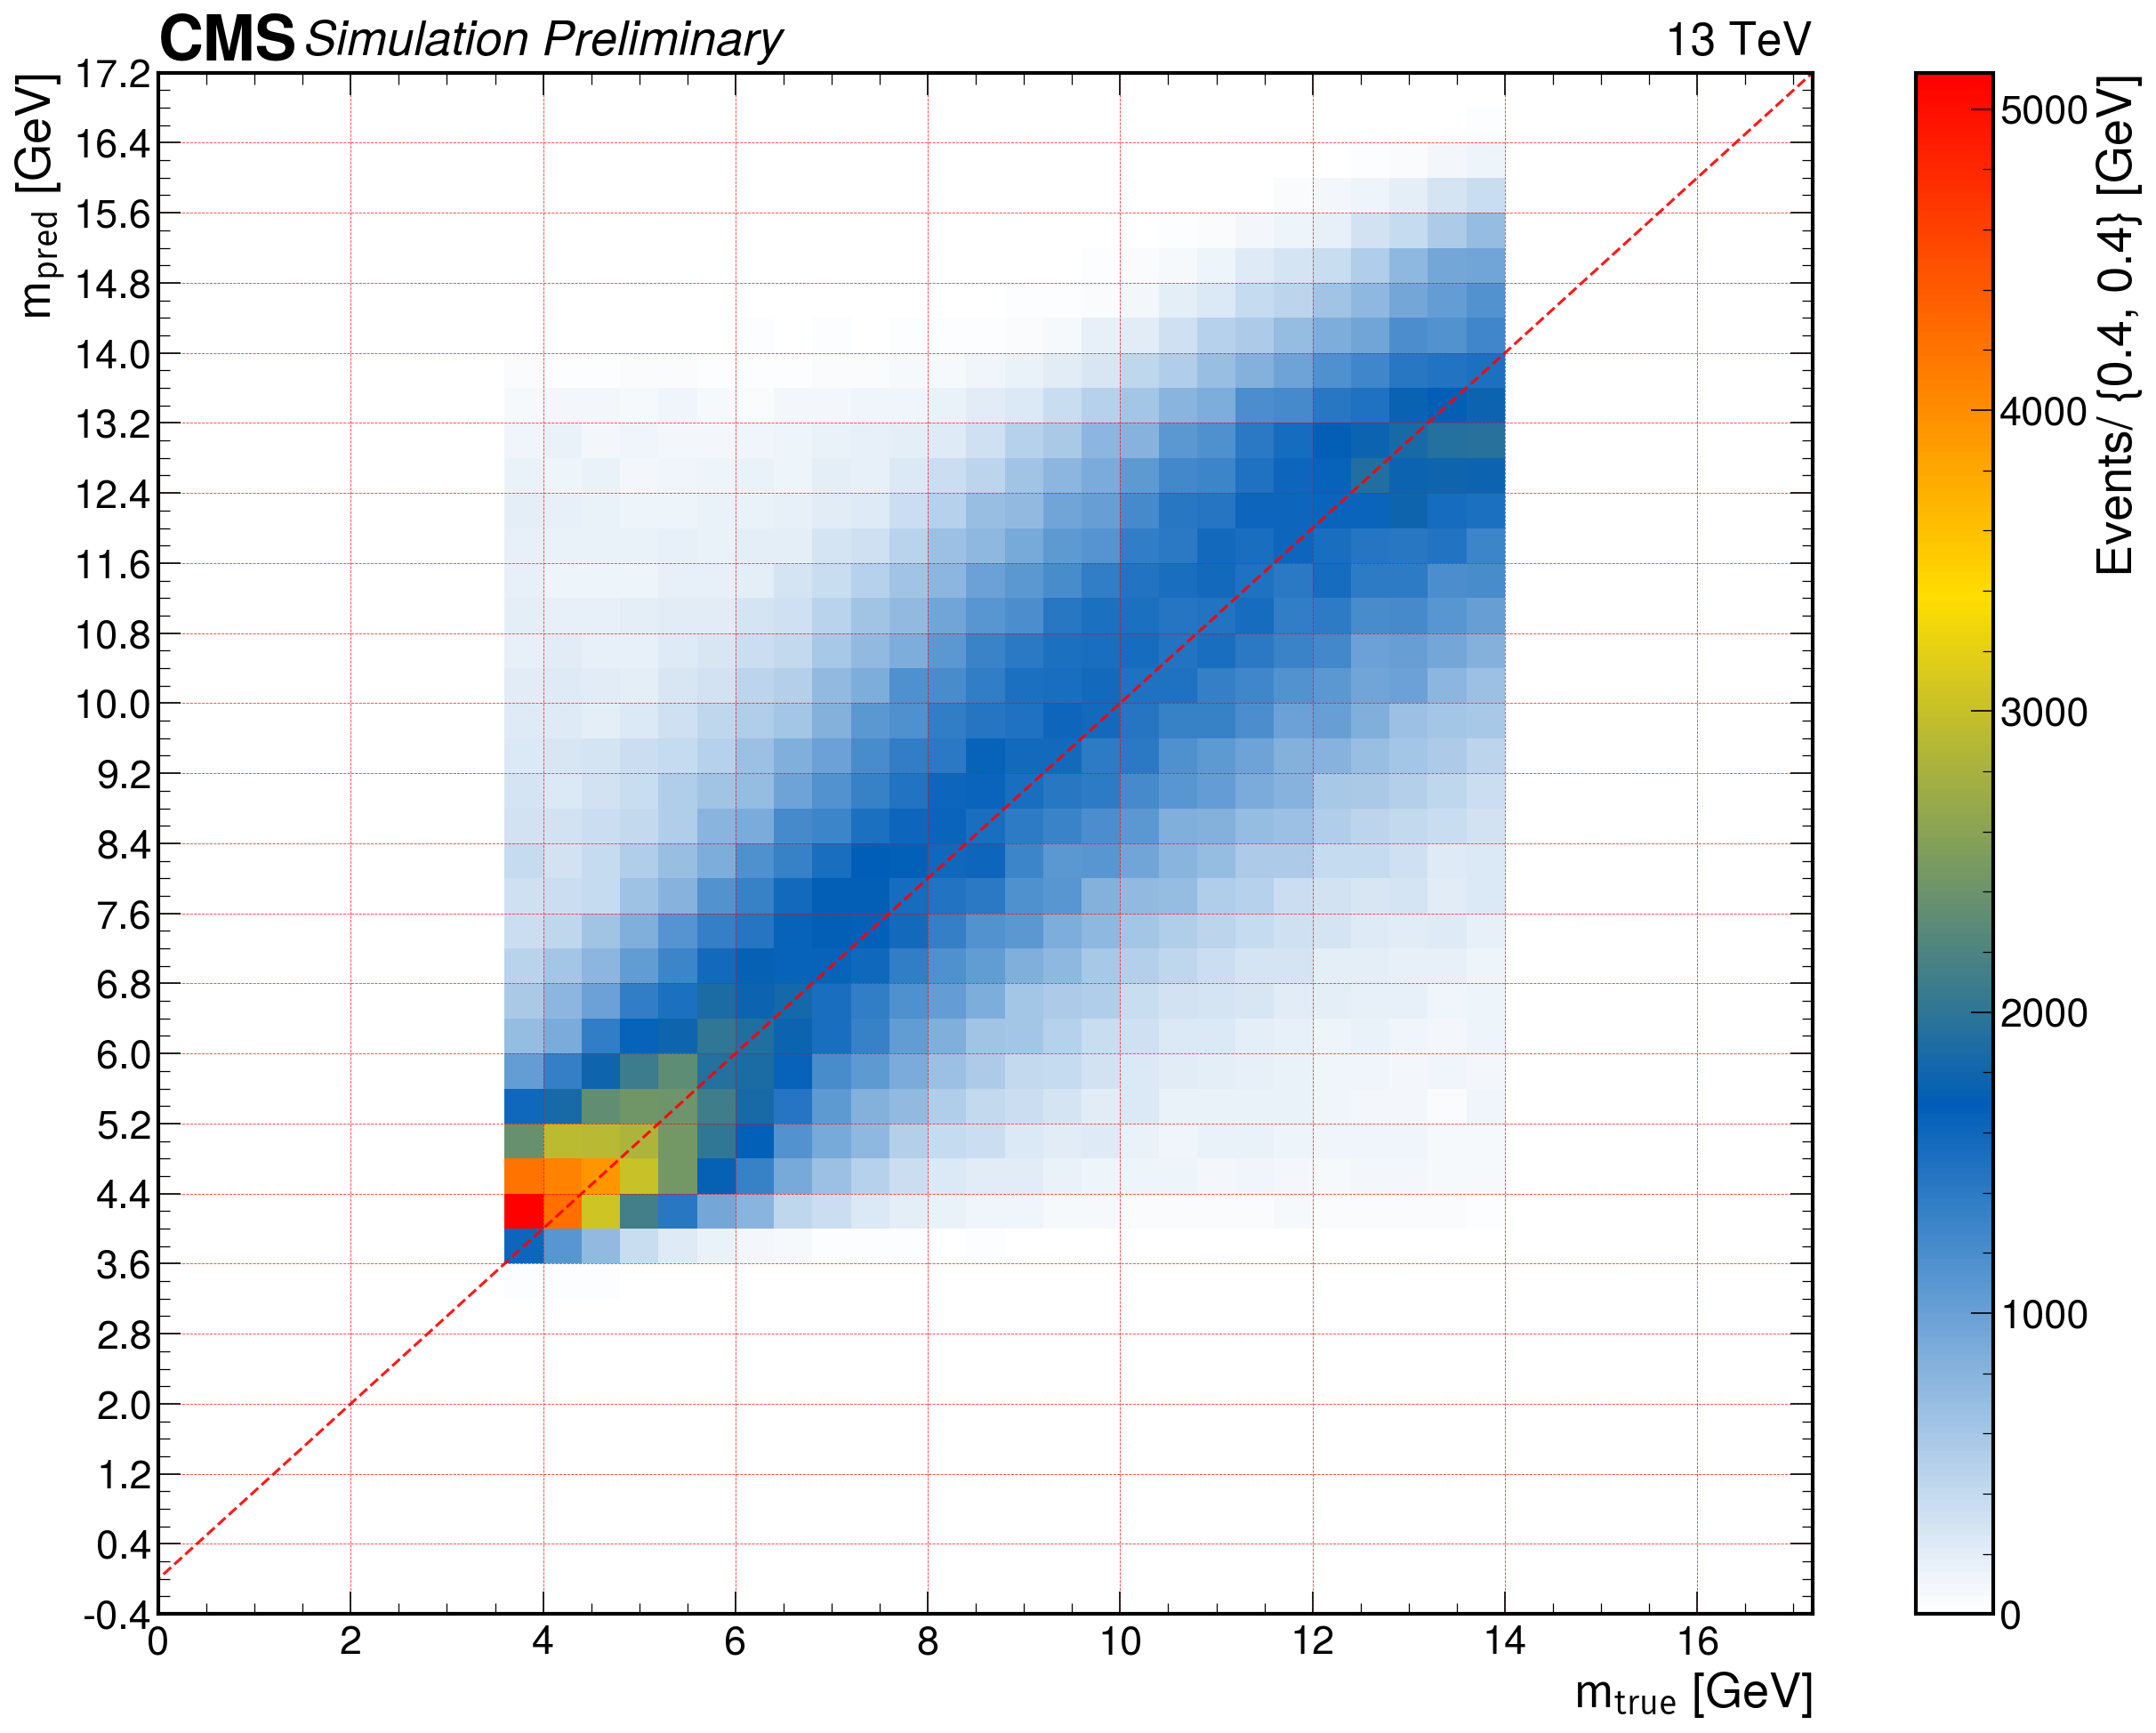

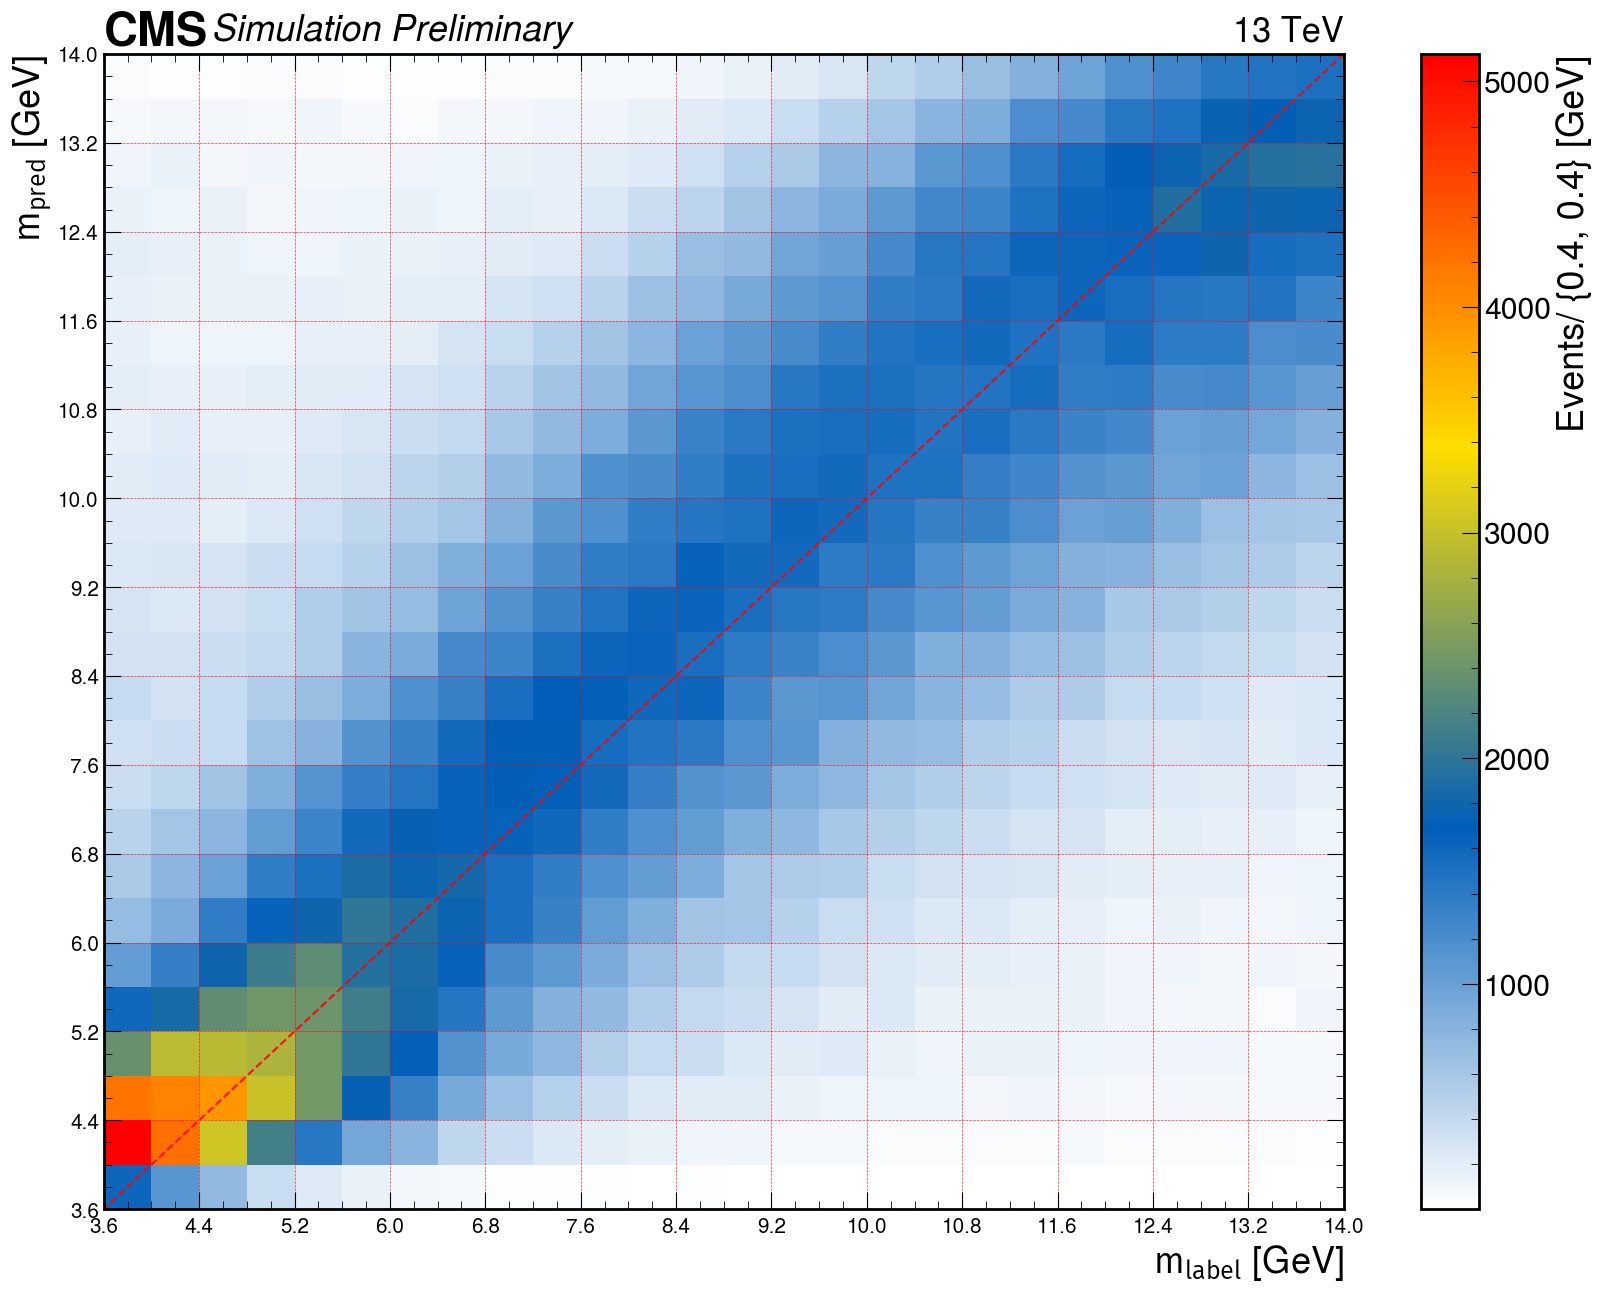

In [16]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8))
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8))
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()